# <font color='blue'>Problem Statement</font>

Surprise Housing, a US-based real estate firm, has chosen to enter the Australian market. In order to buy homes for less than their actual value and sell them for more, the company uses data analytics. A data set from Australian home sales has been gathered by the company for the same objective.
The business is looking at potential properties to purchase in order to enter the market. In order to determine the potential properties' actual value and whether to invest in them, you must construct a regression model using regularisation.

The company is curious about:<br>
1)Which elements are crucial for estimating the cost of a property, and <br/>
2)How accurately such factors reflect a home's pricing.

# <font color='blue'>Objectives</font>

1. What factors are important for determining the cost of a house?
2. How well those factors reflect the cost of a home.
3. Choose the ideal value of lambda for ridge and lasso regression.

# <font color='blue'>Business Goal </font>

Modeling the cost of homes using the relevant independent variables is required. The management will then utilise this model to determine exactly how the prices fluctuate depending on the variables. As a result, they can influence the company's strategy and concentrate on areas that will provide large returns. The tool will also help management better understand how prices change in a new market.

## <font color='orange'>Import All Packages</font>

In [775]:
#Importing libraries

## Basic libraries
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm  

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics


## Statistics
from scipy import stats
from scipy.stats import norm, skew 

## Handling warnings
import warnings
warnings.filterwarnings('ignore')

## <font color='orange'>Data Understanding</font>

In [776]:
#Read Dataset 
house_data=pd.read_csv('H:/Master-AI-ML/IIIT-B/Advanced Regression Assignment/train.csv')

In [777]:
#Verify Dataset is Loaded
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [778]:
#Check Rows and Columns of Dataset
house_data.shape

(1460, 81)

In [779]:
#Show first 10 rows of Dataset
house_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [780]:
#Check Data Types of Dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [781]:
#Check Information of Numeric Columns of Dataset
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [782]:
#Check Name of Columns of Dataset
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## <font color='orange'>Data Quality Check</font>

In [783]:
# Checking Null Values in Dataset
house_data.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [784]:
#Percentage of missing values in each column of Dataframe

missing_Value= house_data.isnull().sum().sort_values(ascending = False)
missing_Value_percent=round(100*(house_data.isnull().sum()/len(house_data)), 2).sort_values(ascending=False)
data_missing_values = pd.concat([missing_Value,missing_Value_percent], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
data_missing_values.head(50)

,Total_missing_values,Percent_missing_values
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


#### Now, We can remove all Columns  who have more than 40 percent Missing Values.
#### We can see that in out data set Having 5 Columns who have more than 40 percent Missing Values.

In [785]:
# Remove all Columns who have more than 40 Percent Missing Values
clean_house_data = house_data.loc[:,(100*house_data.isnull().sum()/house_data.shape[0]).sort_values(ascending = False) < 45]
clean_house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [786]:
#Again check Rows and Columns of Dataset
clean_house_data.shape

(1460, 76)

#### Now we verified that all 5 Columns who have more than 40 percent missing Values are removed from the dataset.

In [787]:
#Checking the number of unique values in each column of Dataset
clean_house_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 76, dtype: int64

In [788]:
# Get the value counts of all the columns of Dataset

for col in clean_house_data:
    
    print(clean_house_data[col].astype('category').value_counts())

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
39.0       1
111.0      1
112.0      1
128.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200      25
9600      24
6000      17
9000      14
10800     14
          ..
8930       1
8935       1
8944       1
8960       1
215245     1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
N

0      1436
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64
0      1344
192       6
120       5
224       5
180       4
       ... 
175       1
178       1
40        1
185       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64
0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
1300        1
8300        1
3500        1
2500        1
1400        1
1150        1
800         1
54          1
620         1
560         1
350         1
15500       1
Name: MiscVal, dtype: int64
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      

## <font color='orange'>Data Attribution With Categorical Columns</font>

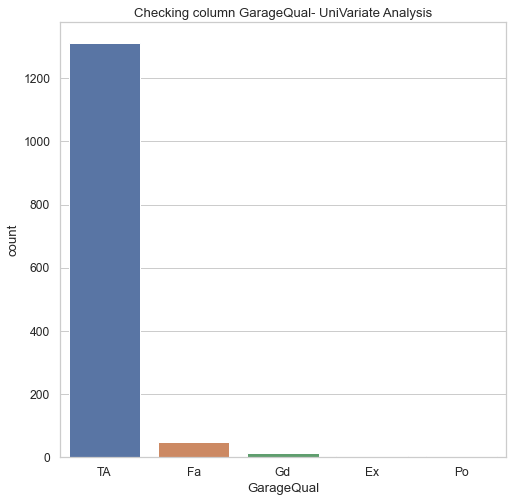

In [789]:
# Data attribution for column 'GarageQual'
plt.figure(figsize=(8,8))
sns.countplot(clean_house_data.GarageQual)
plt.title("Checking column GarageQual- UniVariate Analysis")
plt.show()

In [790]:
#Count the Values of GarageQual Column
clean_house_data.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [791]:
# Most of the values are TA, so we can map the NAN values of above Column
clean_house_data['GarageQual'] = clean_house_data['GarageQual'].replace(np.nan,'TA')

In [792]:
#Check Data Type of GarageQual Column of Dataset
clean_house_data['GarageQual'].dtype

dtype('O')

In [793]:
#Again Count the Values of GarageQual Column
clean_house_data.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

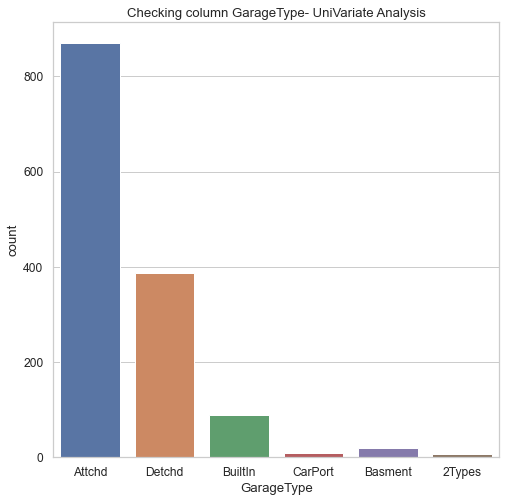

In [794]:
# Data attribution for column 'GarageType'
plt.figure(figsize=(8,8))
sns.countplot(clean_house_data.GarageType)
plt.title("Checking column GarageType- UniVariate Analysis")
plt.show()

In [795]:
#Count the Values of GaragType Column
clean_house_data.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [796]:
# Most of the values are ATTCHD , so we can map the NAN values of Above Column
clean_house_data['GarageType'] = clean_house_data['GarageType'].replace(np.nan,'Attchd')

In [797]:
#Again Count the Values of GaragType Column
clean_house_data.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

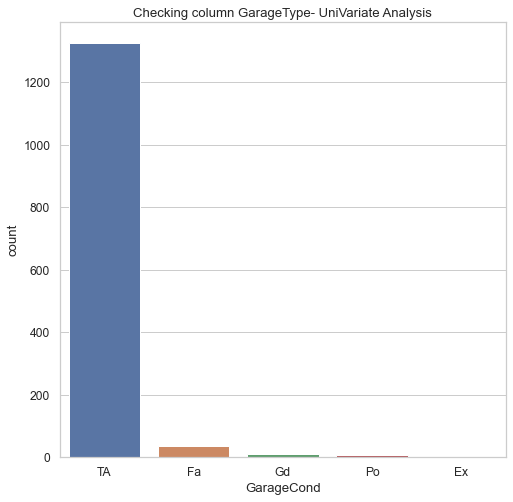

In [798]:
# Data attribution for column 'GarageCond'

plt.figure(figsize=(8,8))
sns.countplot(clean_house_data.GarageCond)
plt.title("Checking column GarageType- UniVariate Analysis")
plt.show()

In [799]:
#Count the Values of GaragCond Column
clean_house_data.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [800]:
# Most of the values is TA , so we can map the NAN values of Above Column
clean_house_data['GarageCond'] = clean_house_data['GarageCond'].replace(np.nan,'TA')

In [801]:
#Again Count the Values of GaragCond Column
clean_house_data.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

## <font color='orange'>Data Attribution With Numeric Columns</font>

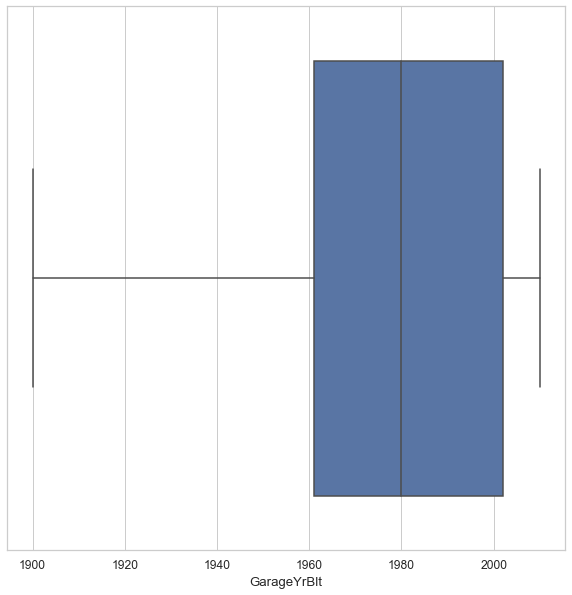

In [802]:
#Outlier analysis of GarageYrBlt Column from the Dataset
sns.boxplot(clean_house_data.GarageYrBlt)
plt.show()

#### There are no outiers so attributing missing values with mean value.

In [803]:
#Attributing missing value with Mean value of GarageYrBlt Column
clean_house_data['GarageYrBlt'].fillna(clean_house_data['GarageYrBlt'].mean(),inplace=True)

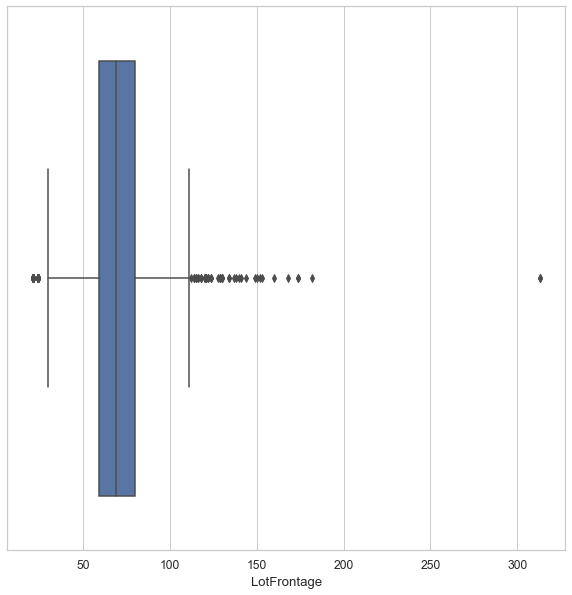

In [804]:
#Outlier analysis of LotFrontage Column from the Dataset
sns.boxplot(clean_house_data.LotFrontage)
plt.show()

#### As there are outliers attributing with median value in dataset.

In [805]:
#Attributing missing value with Median value of LotFrontage Column
clean_house_data['LotFrontage'].fillna(clean_house_data['LotFrontage'].median(),inplace=True)

In [806]:
# Now we have less than 3% of Nan Values,so chose to drop those rows from dataset .

clean_house_data.dropna(inplace=True)

In [807]:
# Final Check-Percentage of missing values in each column of Dataframe

missing_Value= clean_house_data.isnull().sum().sort_values(ascending = False)
missing_Value_percent=round(100*(clean_house_data.isnull().sum()/len(clean_house_data)), 2).sort_values(ascending=False)
data_missing_values = pd.concat([missing_Value,missing_Value_percent], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
data_missing_values.head(50)

,Total_missing_values,Percent_missing_values
Id,0,0.0
FullBath,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
BsmtHalfBath,0,0.0


#### We can verify that our Data set are cleaned.

## <font color='orange'>Exploratory Data Analysis</font>

In [808]:
#Check Clean Dataset Rows and Columns
clean_house_data.shape

(1338, 76)

In [809]:
#Check Numeric Summary of Clean Dataset.
clean_house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,731.228700,56.136024,70.438714,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,...,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,421.779691,41.252576,22.170305,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,...,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,366.250000,20.000000,60.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,730.500000,50.000000,69.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,...,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,1098.750000,70.000000,80.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,...,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [810]:
#Check Information of Clean Dataset.
clean_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotFrontage    1338 non-null   float64
 4   LotArea        1338 non-null   int64  
 5   Street         1338 non-null   object 
 6   LotShape       1338 non-null   object 
 7   LandContour    1338 non-null   object 
 8   Utilities      1338 non-null   object 
 9   LotConfig      1338 non-null   object 
 10  LandSlope      1338 non-null   object 
 11  Neighborhood   1338 non-null   object 
 12  Condition1     1338 non-null   object 
 13  Condition2     1338 non-null   object 
 14  BldgType       1338 non-null   object 
 15  HouseStyle     1338 non-null   object 
 16  OverallQual    1338 non-null   int64  
 17  OverallCond    1338 non-null   int64  
 18  YearBuil

In [811]:
#Check Column Names of Clean Dataset.
clean_house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

####  We can learn more about the years of construction from the four columns. how to create a new column Age of the structure and the removal of the other columns. We use the renovation date because using the original date of construction would not be appropriate if the house had been improved.

In [812]:
clean_house_data['Age']=clean_house_data['YrSold']-clean_house_data['YearRemodAdd']
clean_house_data['Age'].head(10)

0     5
1    31
2     6
3    36
4     8
5    14
6     2
7    36
8    58
9    58
Name: Age, dtype: int64

In [813]:
clean_house_data=clean_house_data.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [814]:
clean_house_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,WD,Normal,250000,8
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,30,0,320,0,0,700,WD,Normal,143000,14
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,57,0,0,0,0,0,WD,Normal,307000,2
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,204,228,0,0,0,350,WD,Normal,200000,36
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,205,0,0,0,0,WD,Abnorml,129900,58
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,4,0,0,0,0,0,WD,Normal,118000,58


####  We can remove the ID Column because it is not useful for us further Analysis.

In [815]:
#Remove ID Column
clean_house_data=clean_house_data.drop(['Id'], axis = 1) 

In [816]:
#Plot Histograms for all numeric Columns of Clean Dataset
numeric_data = clean_house_data.dtypes[clean_house_data.dtypes != "object"].index
numeric_data

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

## <font color='orange'>Univariate Analysis with Clean Dataset-Numeric Columns</font>

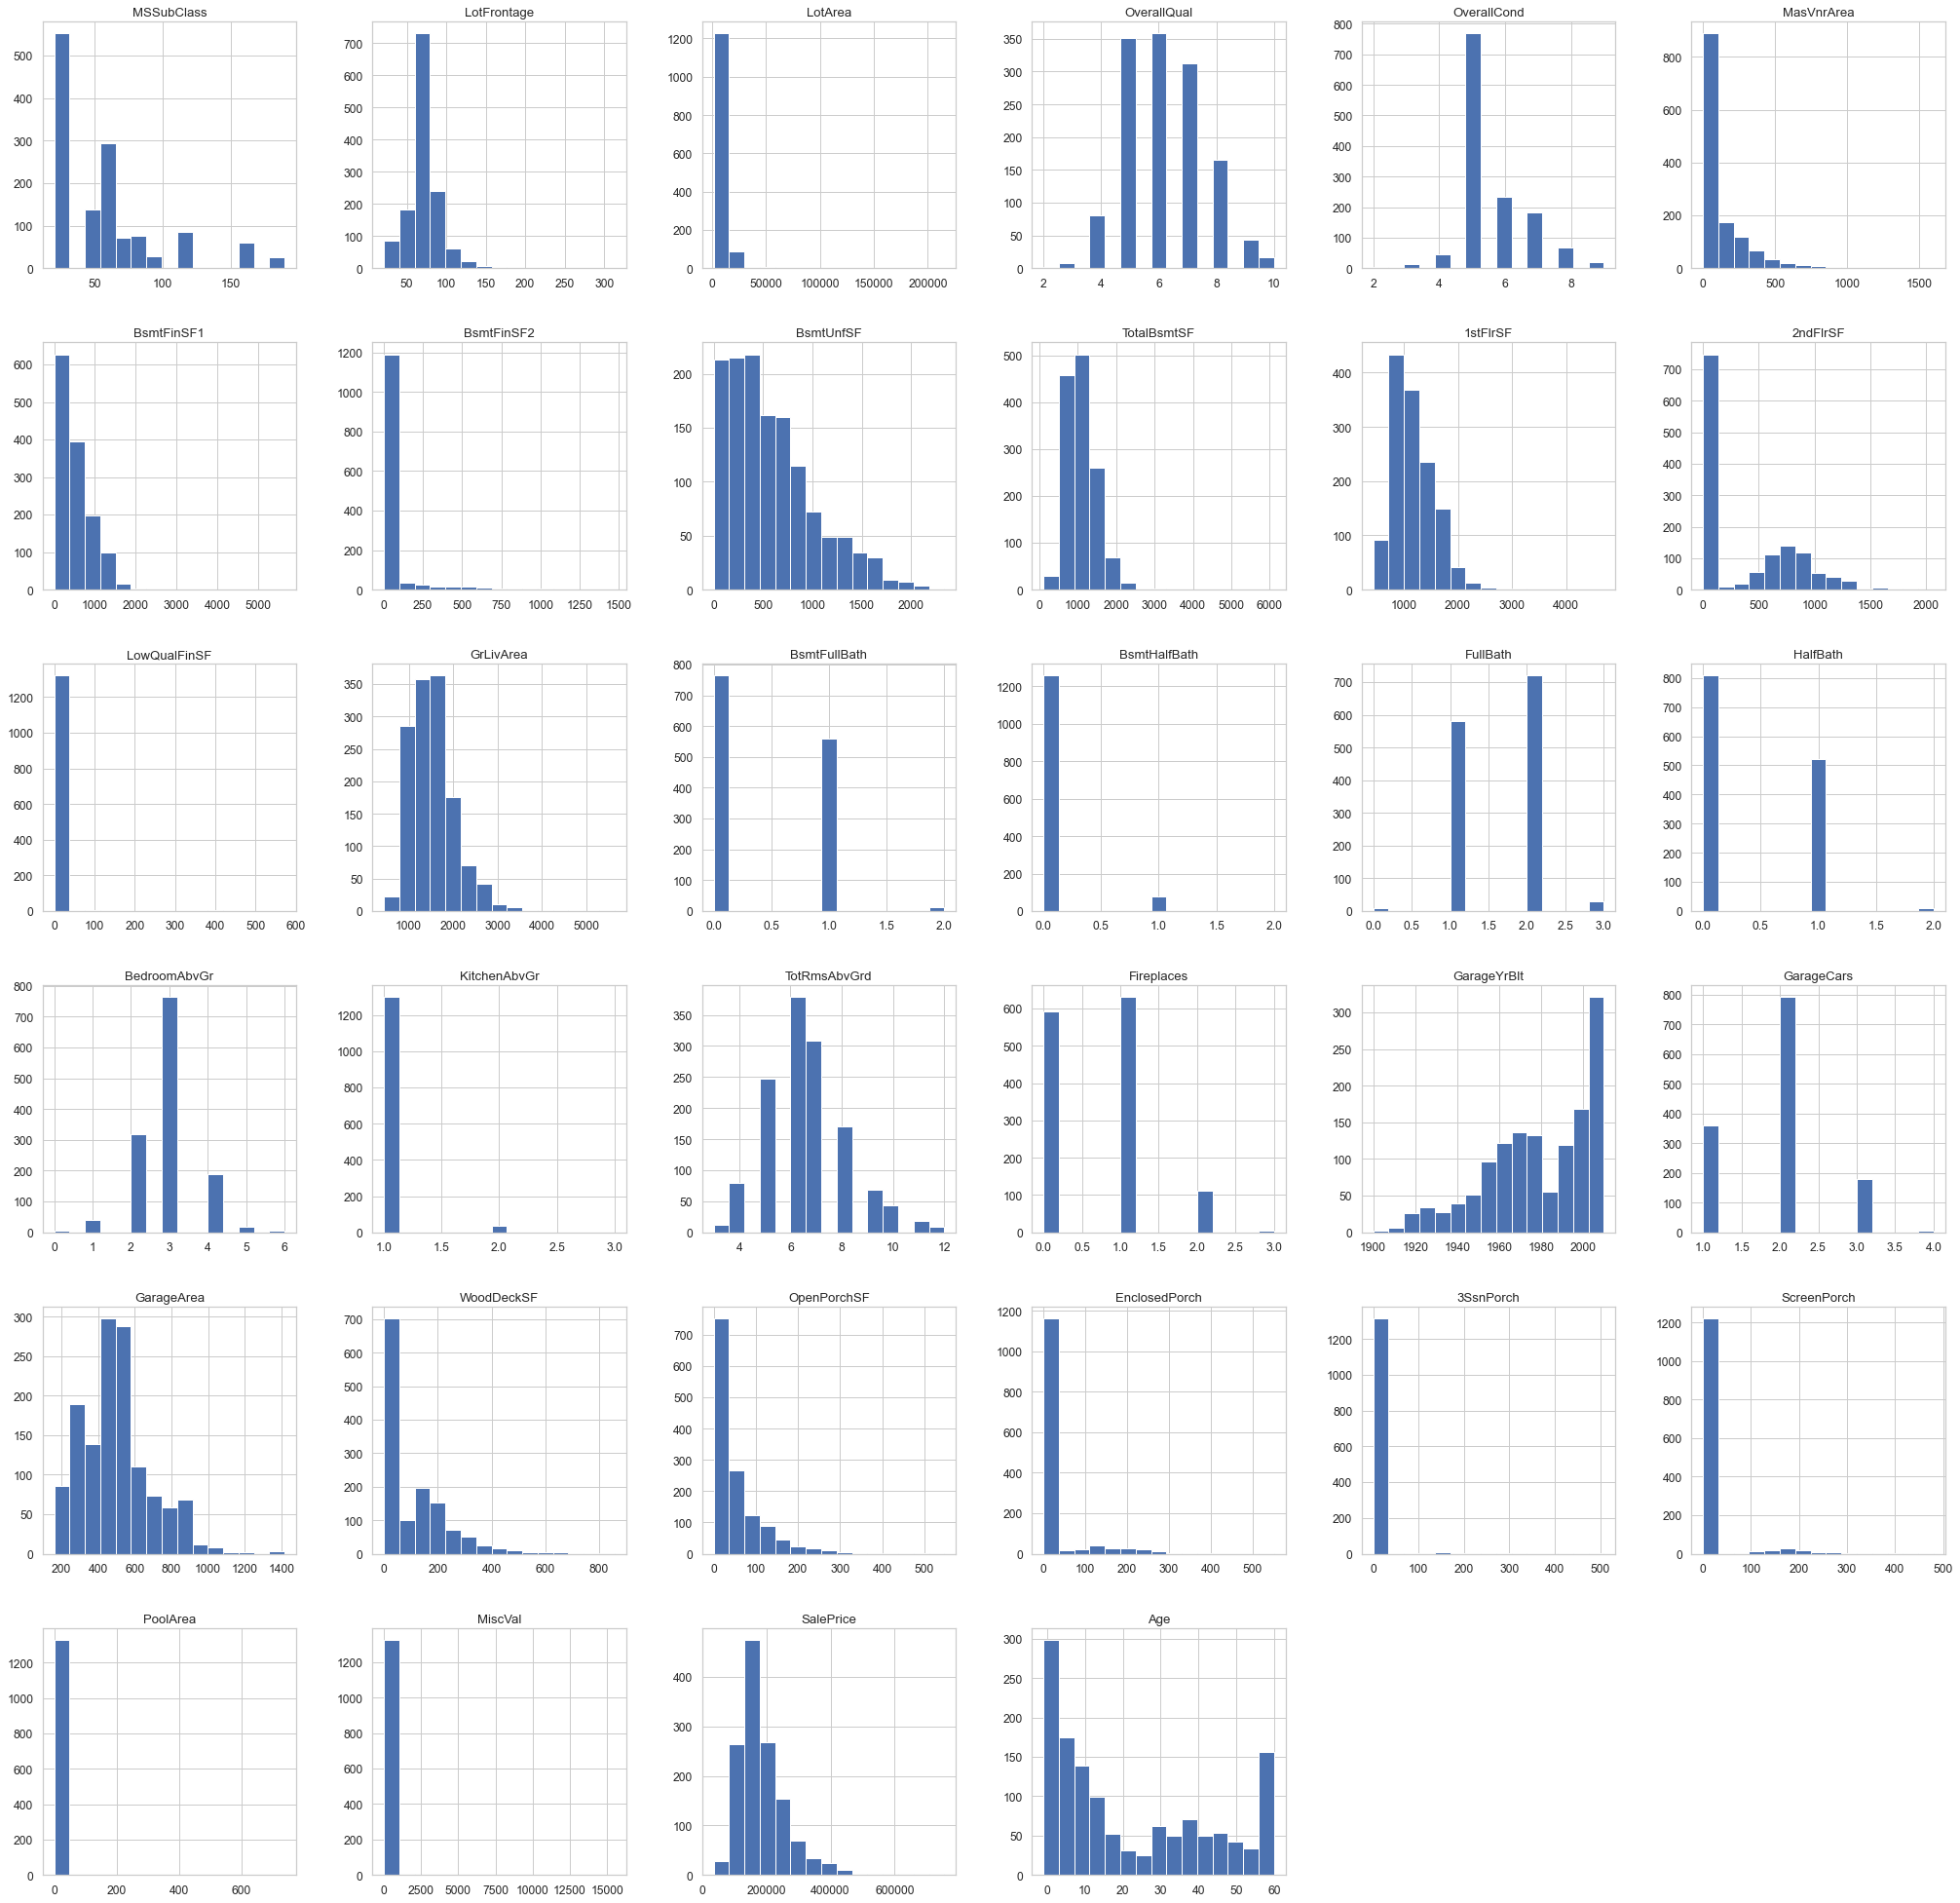

In [817]:
clean_house_data[numeric_data].hist(bins=15, figsize=(35, 35))
plt.show()

#### We observe that a few variables are significantly skewed, and it's possible that they could also be related to one another, which It is really difficult to understand this from an independent analysis.

In [818]:
# Get correlation matrix of Clean Dataset
cor = clean_house_data.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
MSSubClass,1.000000,-0.358160,-0.134158,0.051690,-0.098153,0.031333,-0.069053,-0.079329,-0.141025,-0.263613,...,-0.070278,-0.010175,-0.000359,-0.022598,-0.041391,-0.022748,0.010199,-0.021512,-0.079599,-0.039933
LotFrontage,-0.358160,1.000000,0.297748,0.226289,-0.043373,0.176002,0.219077,0.039043,0.105480,0.378261,...,0.332965,0.068108,0.143339,0.015528,0.064049,0.031865,0.185851,-0.002243,0.327835,-0.077363
LotArea,-0.134158,0.297748,1.000000,0.090451,0.001415,0.096727,0.210148,0.110493,-0.014589,0.267188,...,0.168630,0.167822,0.084942,-0.017968,0.019326,0.038489,0.077050,0.040824,0.254757,-0.002473
OverallQual,0.051690,0.226289,0.090451,1.000000,-0.163080,0.401175,0.197441,-0.086014,0.292940,0.505897,...,0.530092,0.218570,0.307615,-0.116931,0.026470,0.045257,0.064570,-0.029351,0.783546,-0.550437
OverallCond,-0.098153,-0.043373,0.001415,-0.163080,1.000000,-0.141080,-0.060068,0.035698,-0.161038,-0.228020,...,-0.204905,-0.012947,-0.060429,0.071473,0.023789,0.053759,-0.003544,0.077314,-0.108627,-0.031386
MasVnrArea,0.031333,0.176002,0.096727,0.401175,-0.141080,1.000000,0.253015,-0.083303,0.104662,0.365629,...,0.367237,0.149182,0.129015,-0.112225,0.015221,0.052474,0.009334,-0.028975,0.465811,-0.168429
BsmtFinSF1,-0.069053,0.219077,0.210148,0.197441,-0.060068,0.253015,1.000000,-0.064855,-0.552809,0.505000,...,0.284095,0.187178,0.107561,-0.105669,0.026811,0.051906,0.142708,0.007869,0.359677,-0.098121
BsmtFinSF2,-0.079329,0.039043,0.110493,-0.086014,0.035698,-0.083303,-0.064855,1.000000,-0.233449,0.083184,...,-0.053411,0.061206,0.004211,0.045668,-0.031475,0.085865,0.041148,0.006246,-0.031226,0.087432
BsmtUnfSF,-0.141025,0.105480,-0.014589,0.292940,-0.161038,0.104662,-0.552809,-0.233449,1.000000,0.363767,...,0.195401,-0.020711,0.122171,-0.003372,0.023701,-0.023065,-0.039315,-0.018566,0.191689,-0.174462
TotalBsmtSF,-0.263613,0.378261,0.267188,0.505897,-0.228020,0.365629,0.505000,0.083184,0.363767,1.000000,...,0.511475,0.214364,0.255939,-0.104484,0.043142,0.068886,0.135654,-0.008679,0.602042,-0.264431


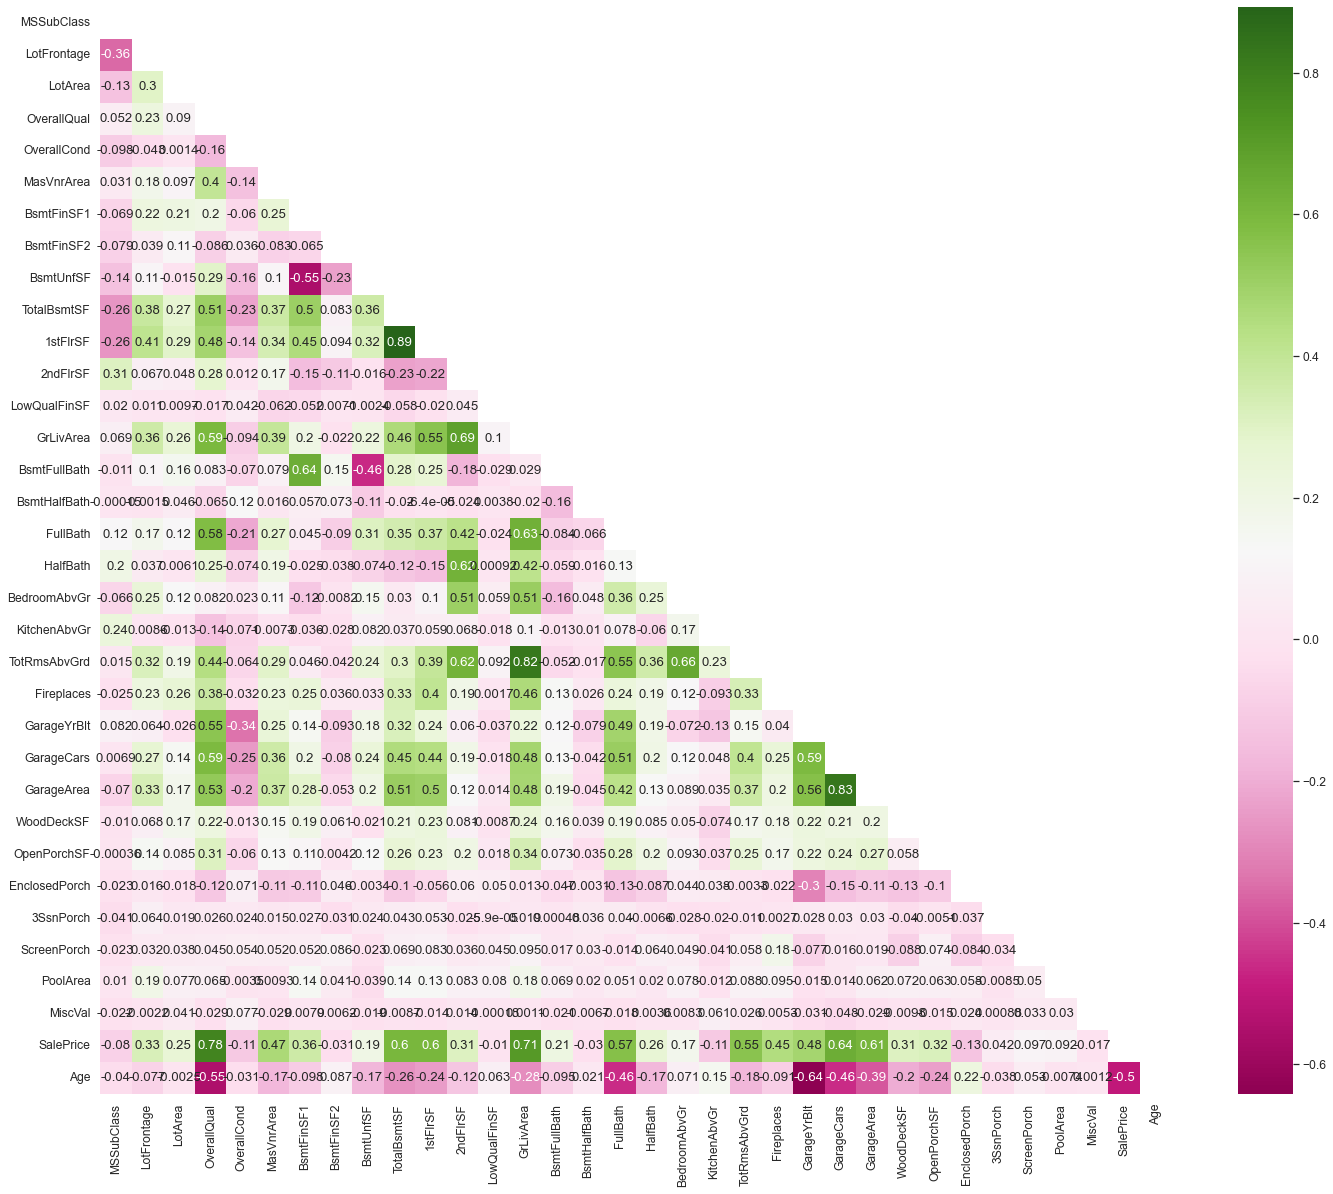

In [819]:
# plotting correlations on a heatmap

plt.figure(figsize=(24,20))
# heatmap
matrix = np.triu(cor)
sns.heatmap(cor, cmap="PiYG", annot=True,mask=matrix)
plt.show()

#### From above Corelation Matrix,We can see that SalePrice is very high positively correlated with -Overall Quality(0.79),1stFlrSF (0.61),TotalBsmtSF (0.61),GrLivArea (0.71),FullBath(0.58),TotRmsAbvGrd(0.55),GarageCars(0.64), GarageAre(0.62) and  very high negatively correlated to the Age(-0.5)

## <font color='orange'>Bivariate Analysis with Numeric Corelated Variables</font>

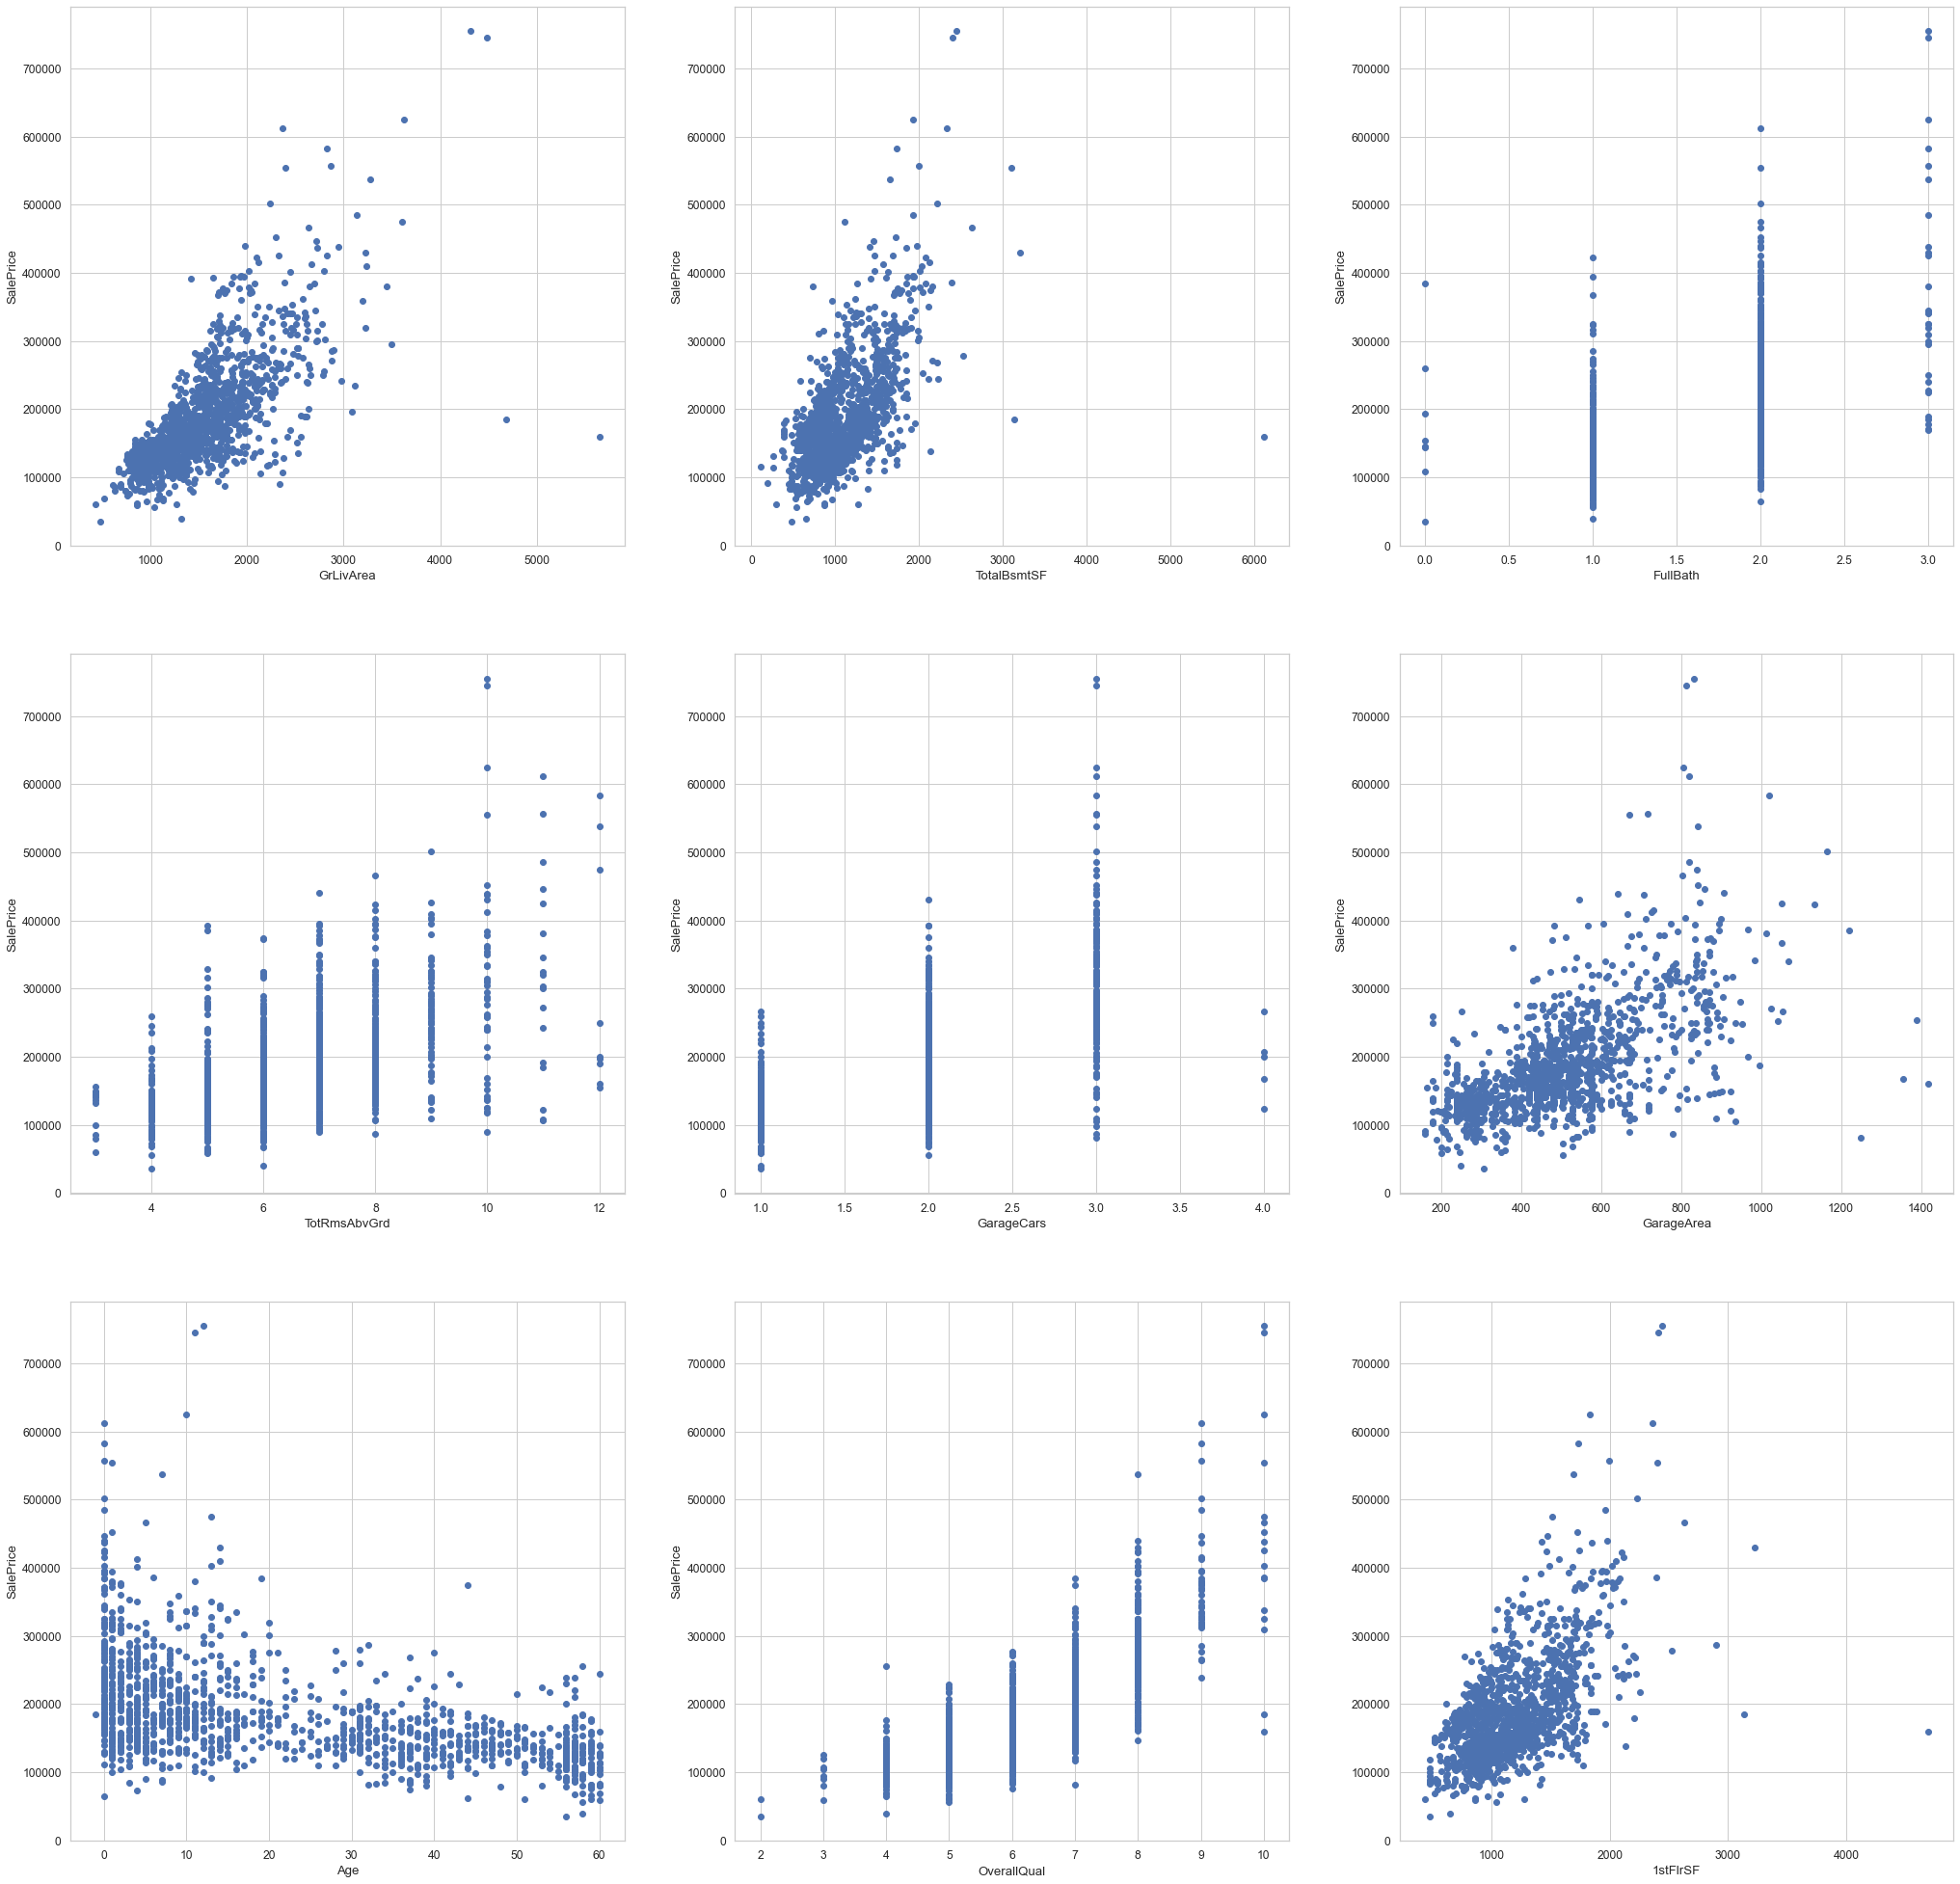

In [820]:
#Plot Scatterplot salePrice v/s all corelated Variables

plt.figure(figsize = (35,35))
plt.subplot(3,3,1)
plt.scatter(clean_house_data.GrLivArea, clean_house_data.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(clean_house_data.TotalBsmtSF, clean_house_data.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.subplot(3,3,3)
plt.scatter(clean_house_data.FullBath, clean_house_data.SalePrice)
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.subplot(3,3,4)
plt.scatter(clean_house_data.TotRmsAbvGrd, clean_house_data.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(clean_house_data.GarageCars, clean_house_data.SalePrice)
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.subplot(3,3,6)
plt.scatter(clean_house_data.GarageArea, clean_house_data.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,7)
plt.scatter(clean_house_data.Age, clean_house_data.SalePrice)
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.subplot(3,3,8)
plt.scatter(clean_house_data.OverallQual, clean_house_data.SalePrice)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.subplot(3,3,9)
plt.scatter(clean_house_data['1stFlrSF'], clean_house_data.SalePrice)
plt.xlabel('1stFlrSF')

plt.show()

### <font color='red'>Insights</font>

1. Since the majority of the variables have linear correlations with the sale price, it is possible to create a regression model.
2. We even note that some variables, such as FullBath and GarageCars, are not normally distributed, allowing us to encode them based on their individual characteristics.

## <font color='orange'>Bivariate Analysis with Categorical Variables</font>

In [821]:
cat_data  = clean_house_data.dtypes[clean_house_data.dtypes == "object"].index
cat_data 

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

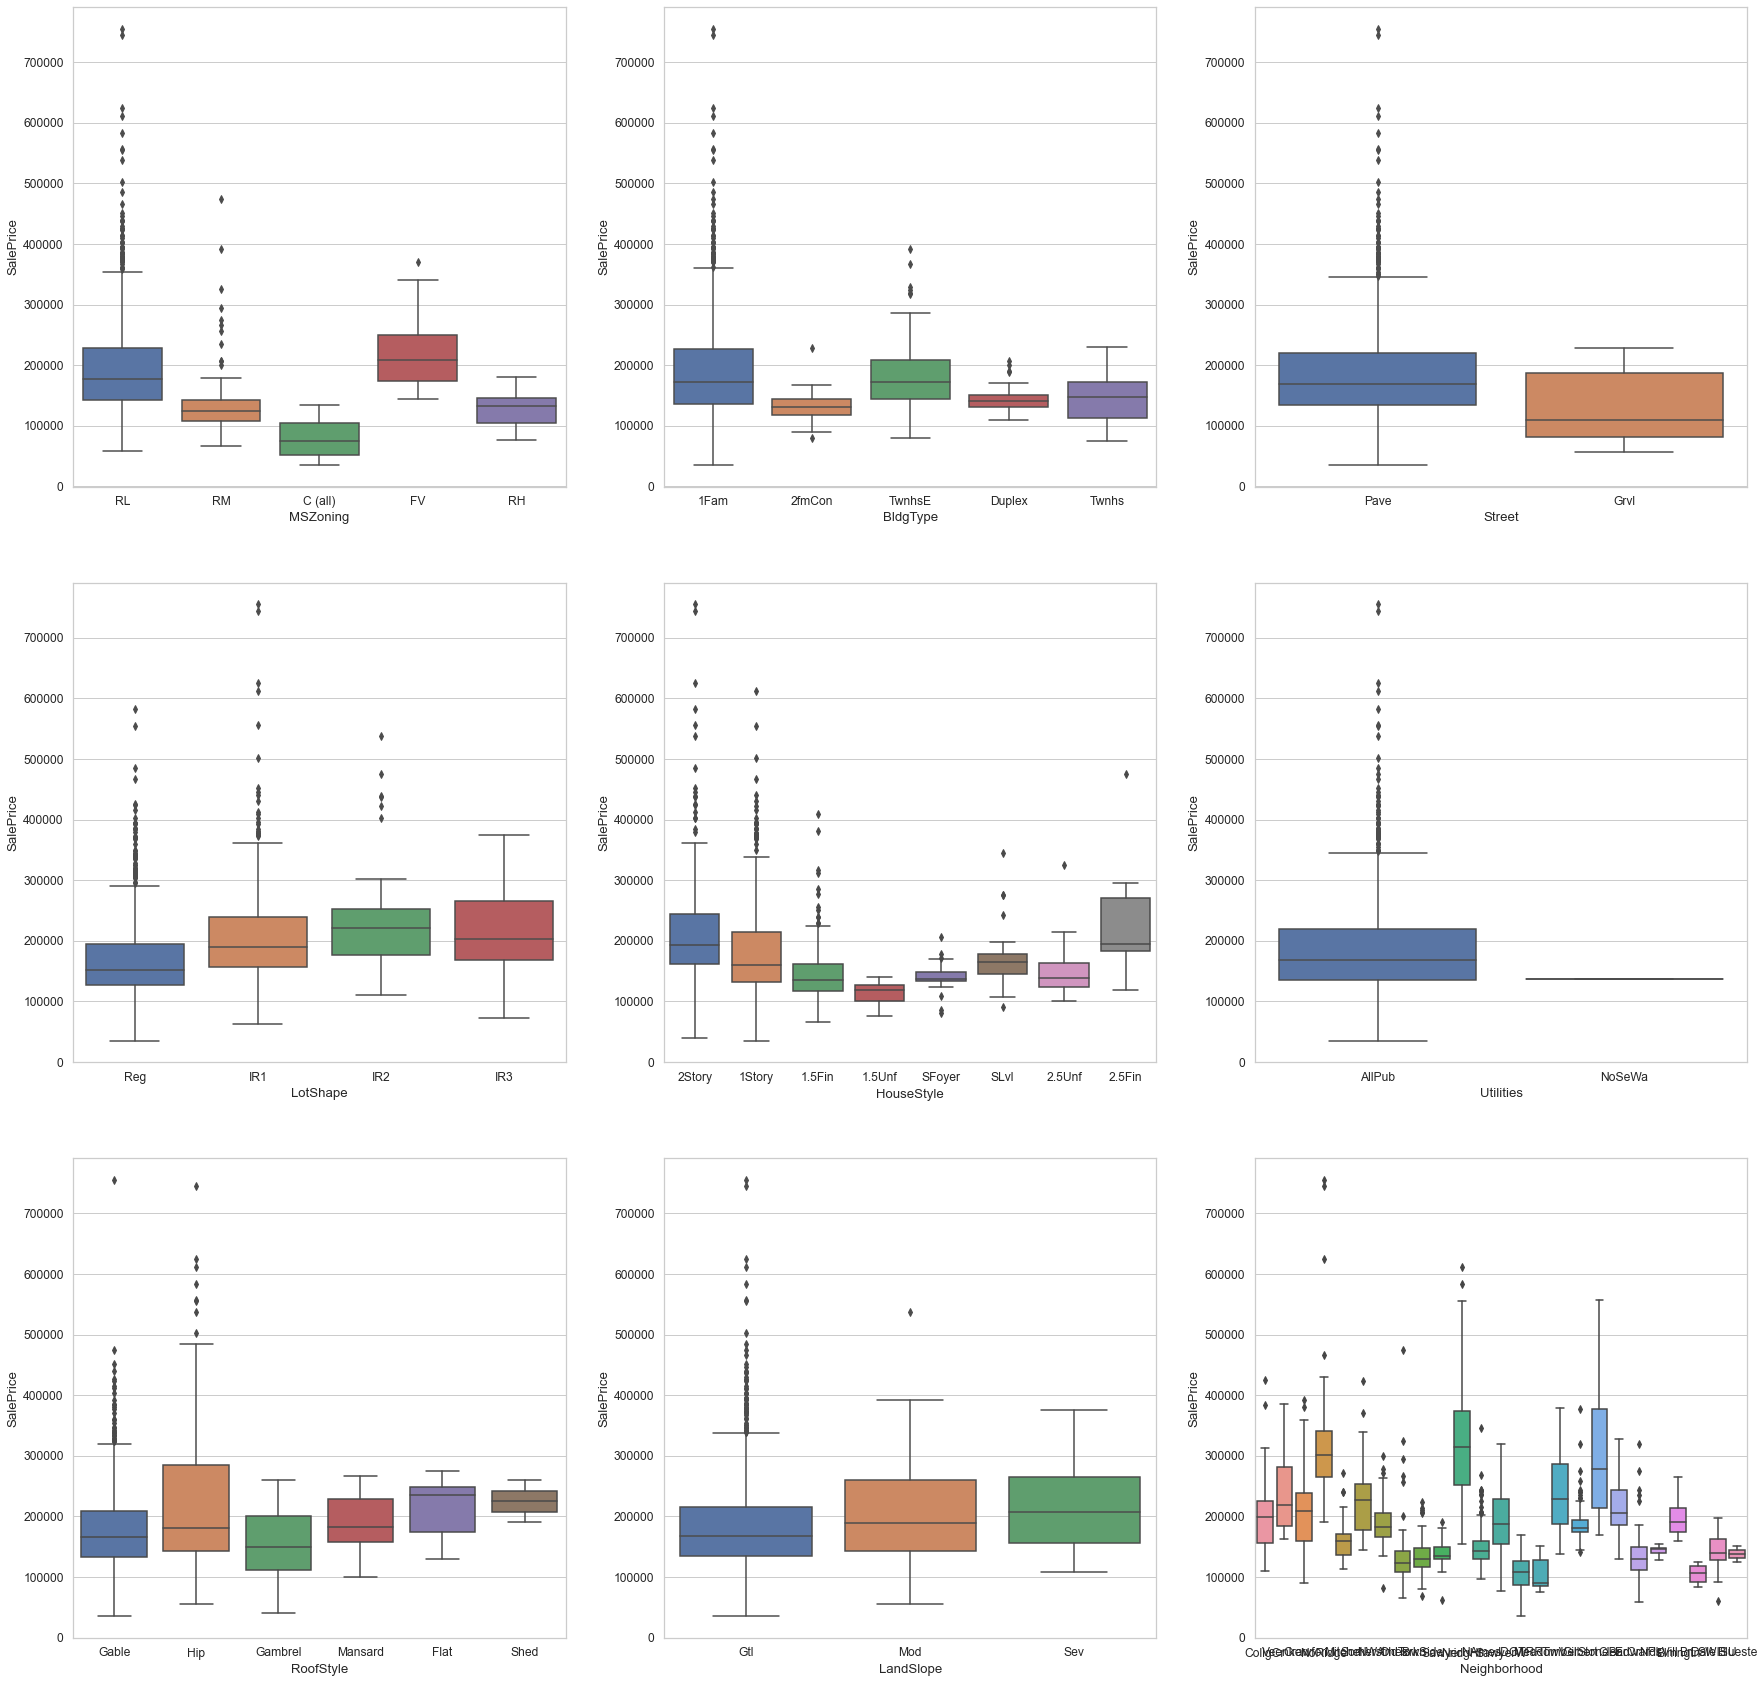

In [822]:
plt.figure(figsize = (30,30)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=clean_house_data)
plt.show()

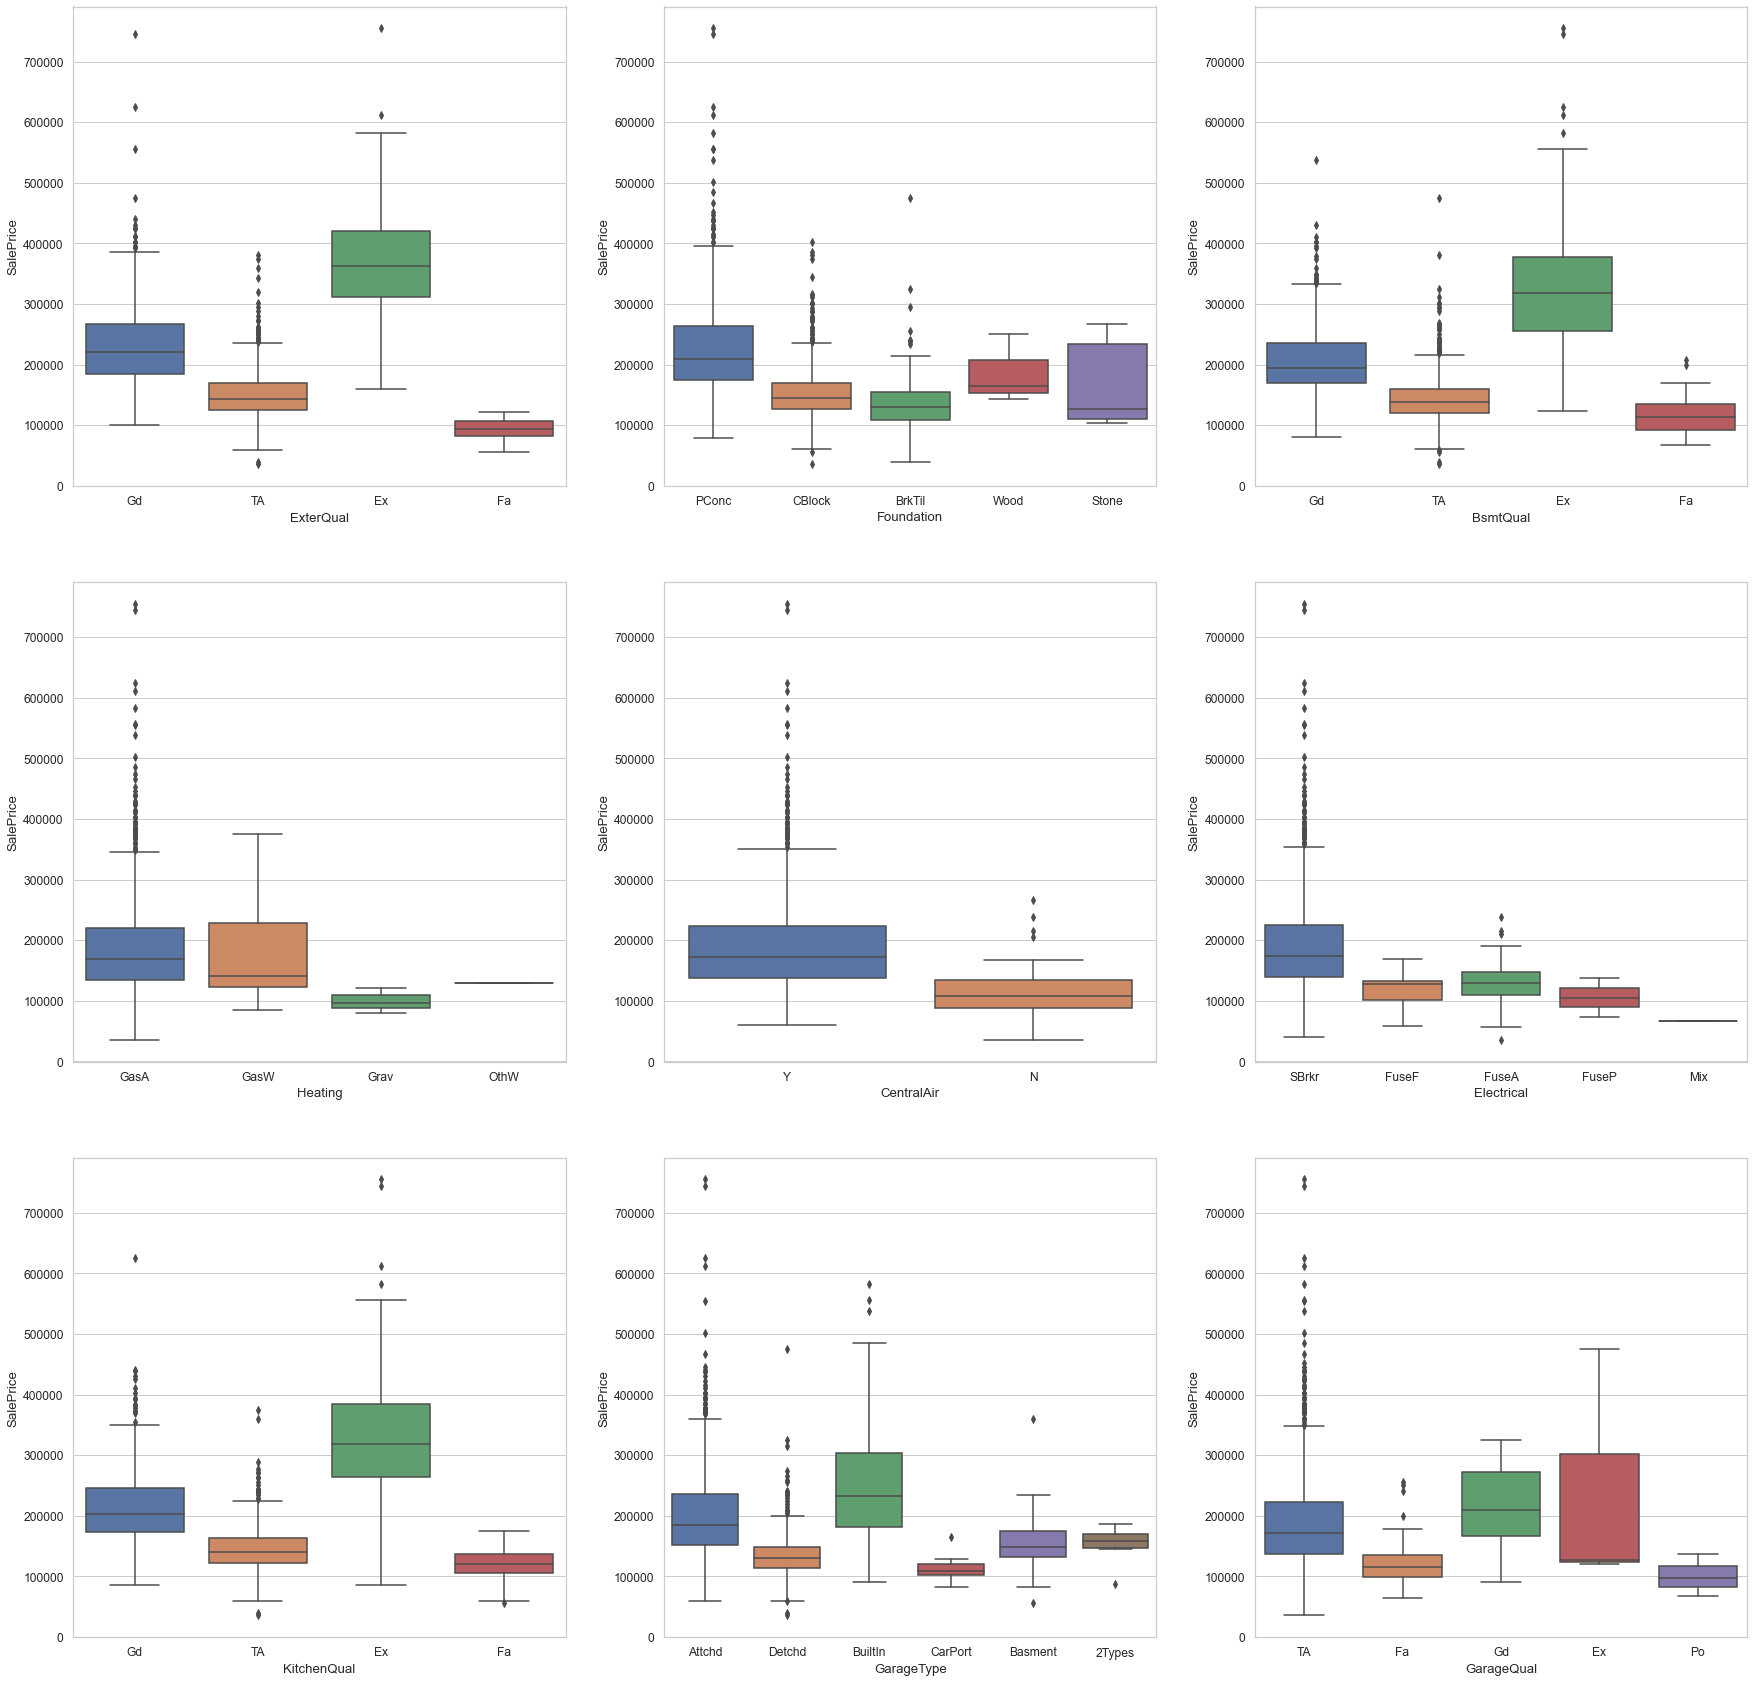

In [823]:
plt.figure(figsize = (30,30)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=clean_house_data)
plt.show()

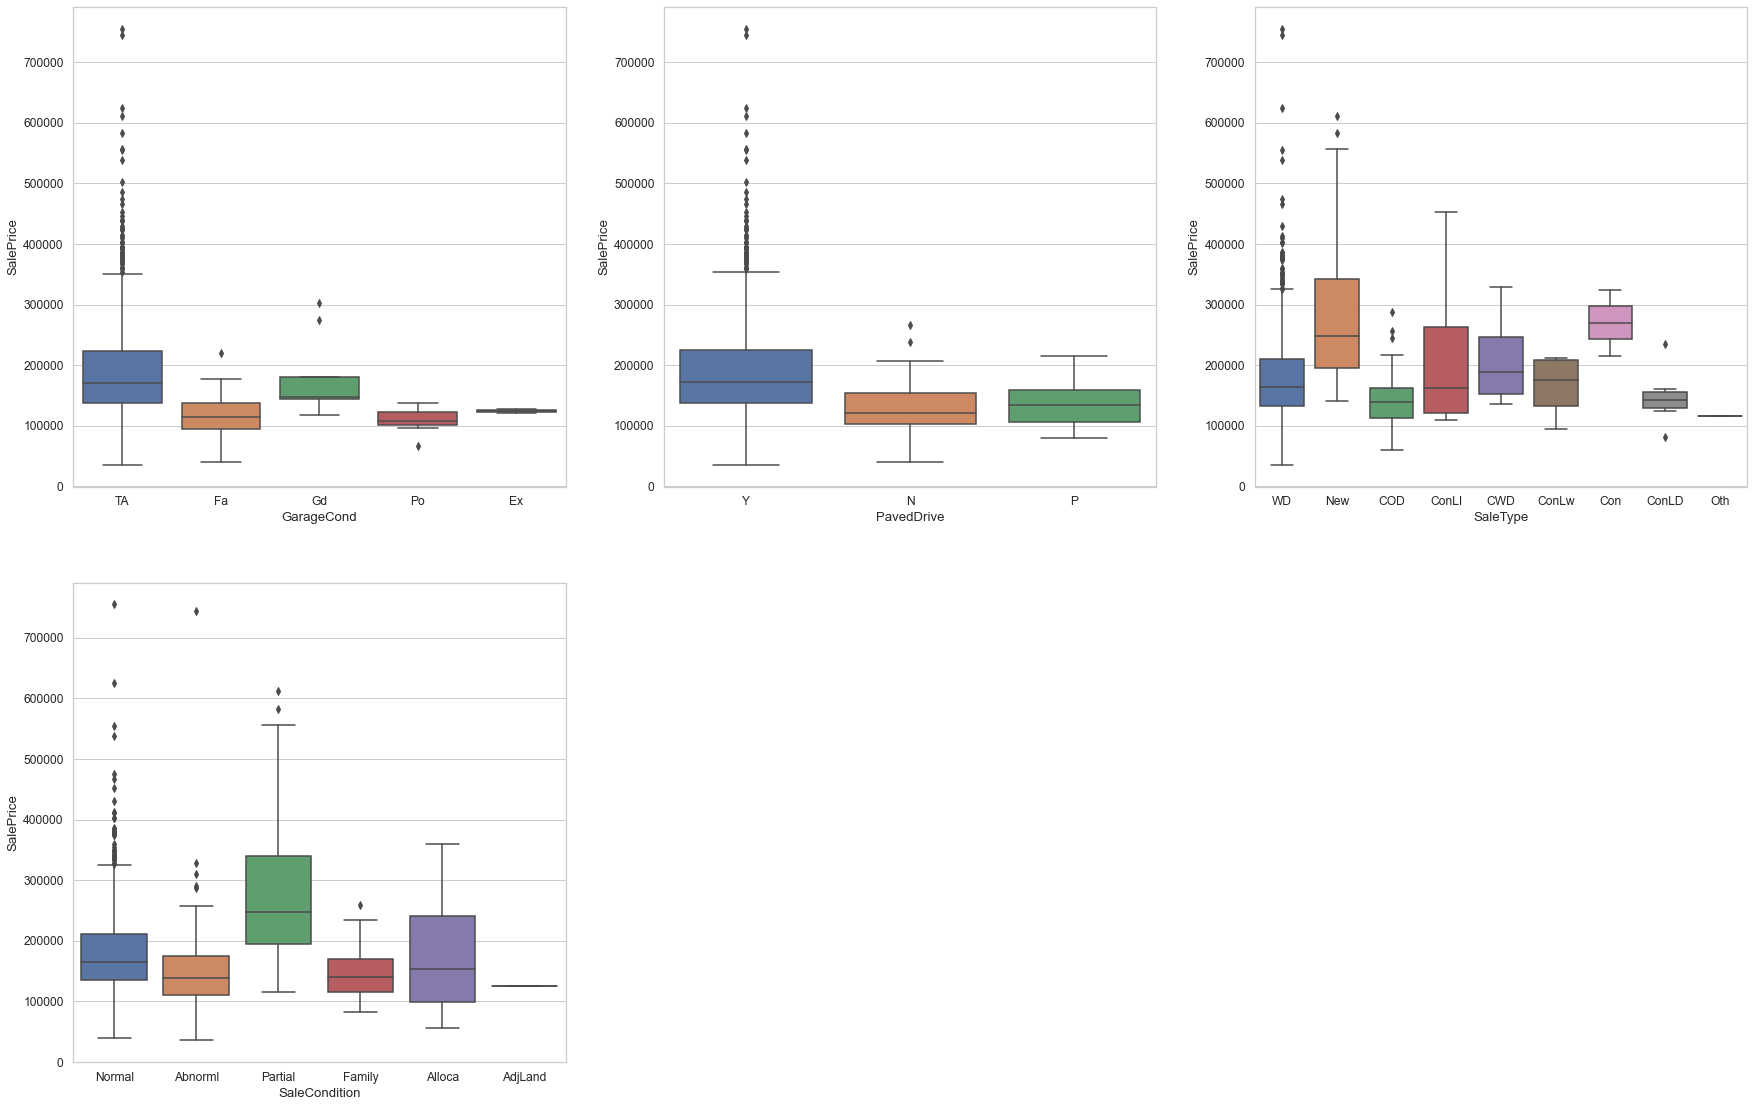

In [824]:
plt.figure(figsize = (30,30)) 
plt.subplot(3,3,1)
sns.boxplot(x='GarageCond', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,2)
sns.boxplot(x='PavedDrive', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,3)
sns.boxplot(x='SaleType', y="SalePrice", data=clean_house_data)
plt.subplot(3,3,4)
sns.boxplot(x='SaleCondition', y="SalePrice", data=clean_house_data)
plt.show()

### <font color='red'>Insights</font>

1. Type 'Fv' of MSZoning has the highest sale price, whereas type 'C' has the lowest sale price
2. When compared to "Grvl," the Street of type "Pave" has a higher sale price.
3. Most of the values in the utilities coulms are set to "AllPub" As a result, we have provided a lot of information in this column. It's not a crucial component.
4. The home with the highest sale price has an exterior quality rating of Excellent.
5. The home with the type Excellent basement quality sold for the most money.
6. The home with the type Excellent kitchen quality sold for the most money.
7. The home with the best garage quality has the highest sale price.
8. The home with the built-in garage has the greatest sale price.
9. The home with the highest sale price has a sale type of type New.

## <font color='orange'>Data Preprocessing</font>

### <font color='green'>Transforming the Sales Price Variable(Target)</font>

In [825]:
#Get Numeric Summary of Target Variable
clean_house_data['SalePrice'].describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

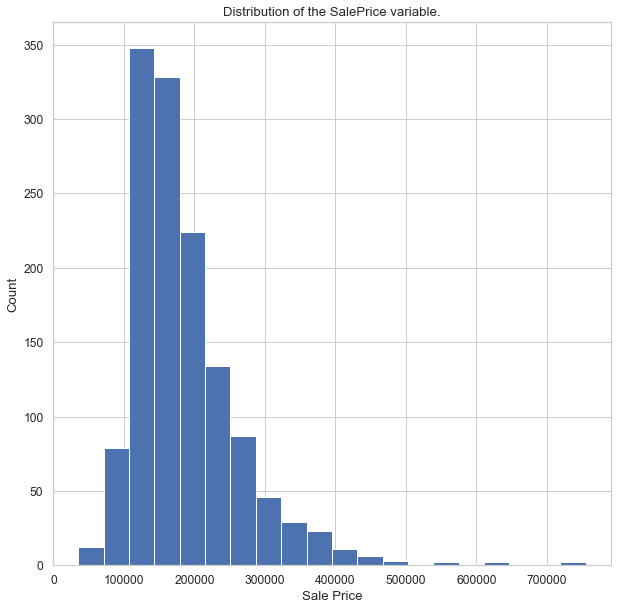

In [826]:
#Check the distribution the SalePrice

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 10]})
sns.distplot(clean_house_data['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()


 mu = 186761.78 and sigma = 78884.35



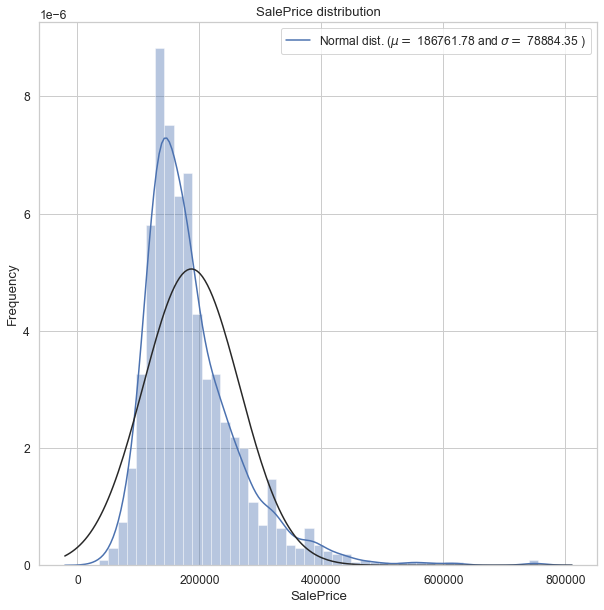

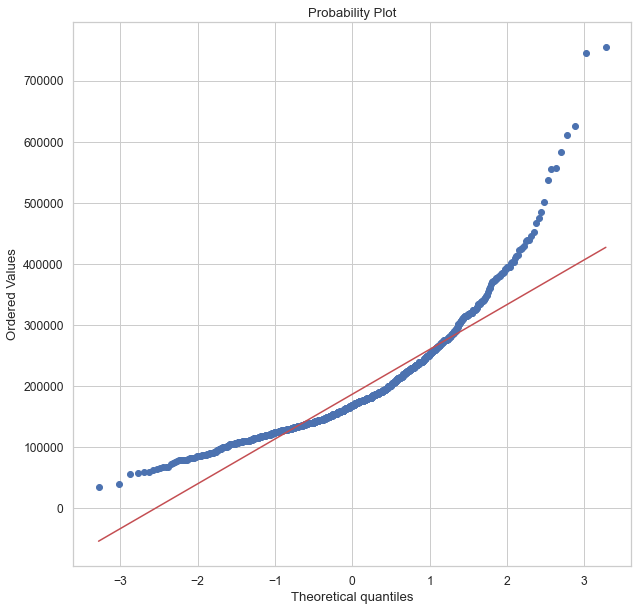

In [827]:
sns.distplot(clean_house_data['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(clean_house_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(clean_house_data['SalePrice'], plot=plt)
plt.show()

### Right skewedness affects the target variable. Using the log transformation approach, we must change this variable and make it regularly distributed.

### <font color='green'>Log Transfomation of Sale Price Variable</font>


 mu = 12.06 and sigma = 0.38



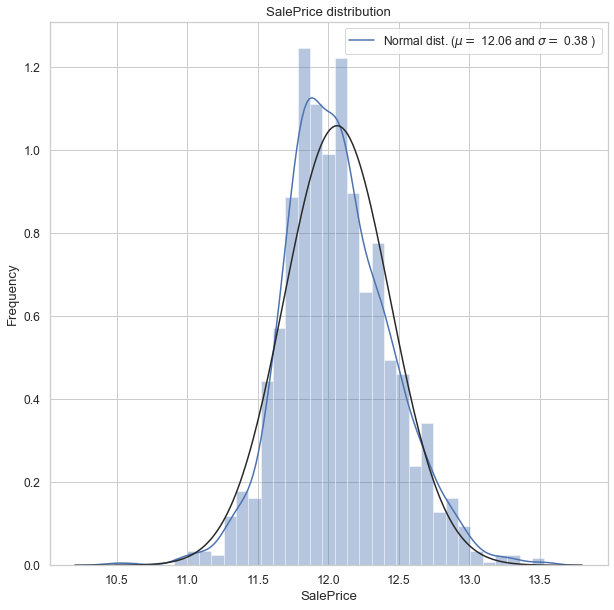

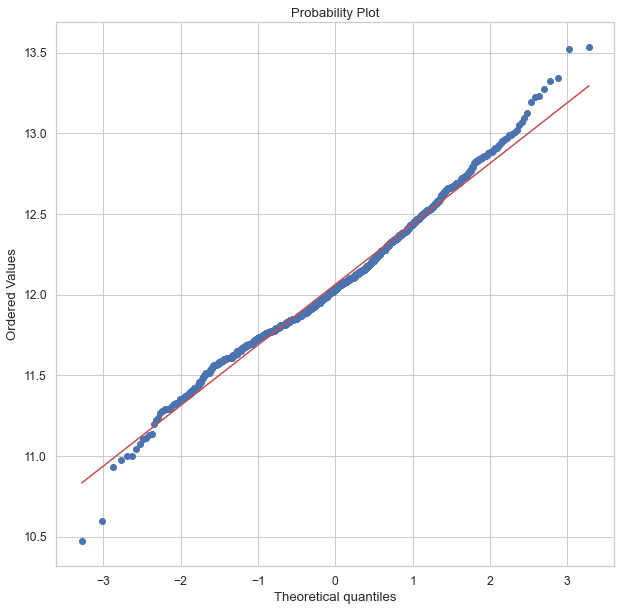

In [828]:
#We use the numpy function log to all elements of the column
clean_house_data["SalePrice"] = np.log(clean_house_data["SalePrice"])

#Checking the new distribution 
sns.distplot(clean_house_data['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(clean_house_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(clean_house_data['SalePrice'], plot=plt)
plt.show()

### <font color='green'>Encoding of Categorical Variables(Manually) </font>

In [829]:
# List of variables to map
def map_1(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_2(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_3(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_4(x):
    return x.map({'Y':1,'N':0})
def map_5(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_6(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_7(x):
    return x.map({'Y':2,'P':2,'N':0})

clean_house_data['ExterQual'] = clean_house_data[['ExterQual']].apply(map_1)
clean_house_data['ExterCond'] = clean_house_data[['ExterCond']].apply(map_1)
clean_house_data['BsmtQual'] = clean_house_data[['BsmtQual']].apply(map_1)
clean_house_data['BsmtCond'] = clean_house_data[['BsmtCond']].apply(map_1)
clean_house_data['BsmtExposure'] = clean_house_data[['BsmtExposure']].apply(map_2)
clean_house_data['BsmtFinType1'] = clean_house_data[['BsmtFinType1']].apply(map_3)
clean_house_data['BsmtFinType2'] = clean_house_data[['BsmtFinType2']].apply(map_3)
clean_house_data['HeatingQC'] = clean_house_data[['HeatingQC']].apply(map_1)
clean_house_data['CentralAir'] = clean_house_data[['CentralAir']].apply(map_4)
clean_house_data['KitchenQual'] = clean_house_data[['KitchenQual']].apply(map_1)
clean_house_data['Functional'] = clean_house_data[['Functional']].apply(map_5)
clean_house_data['GarageFinish'] = clean_house_data[['GarageFinish']].apply(map_6)
clean_house_data['GarageQual'] = clean_house_data[['GarageQual']].apply(map_1)
clean_house_data['GarageCond'] = clean_house_data[['GarageCond']].apply(map_1)
clean_house_data['PavedDrive'] = clean_house_data[['PavedDrive']].apply(map_7)

In [830]:
#conveeting the columns MSSubClass as categorical as it is a categorical col and not numerical
clean_house_data['MSSubClass']=clean_house_data['MSSubClass'].astype('object')

In [831]:
cat_data  = clean_house_data.dtypes[clean_house_data.dtypes == "object"].index
cat_data

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [832]:
#Final check of missing values 

Total_missing = clean_house_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*clean_house_data.isnull().sum()/clean_house_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
MSSubClass,0,0.0
MSZoning,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
...,...,...
ExterQual,0,0.0
MasVnrArea,0,0.0
MasVnrType,0,0.0
Exterior2nd,0,0.0


## <font color='orange'>Creating Dummy Variables</font>

In [833]:
# Creating dummies
dummy_data = pd.get_dummies(clean_house_data[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy_data.head(10)

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [834]:
# Adding the results to the cleaned dataset
clean_house_data = pd.concat([clean_house_data, dummy_data], axis=1)
clean_house_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,1,0
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,0,0
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [835]:
# Dropping the columns whose dummies have been created
clean_house_data=clean_house_data.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [836]:
#Check the Shape of Dataset
clean_house_data.shape

(1338, 202)

In [837]:
#Final check of missing values 

Total_missing = clean_house_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*clean_house_data.isnull().sum()/clean_house_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
LotFrontage,0,0.0
RoofMatl_Roll,0,0.0
HouseStyle_SFoyer,0,0.0
HouseStyle_SLvl,0,0.0
RoofStyle_Gable,0,0.0
...,...,...
LandContour_HLS,0,0.0
LandContour_Low,0,0.0
LandContour_Lvl,0,0.0
Utilities_NoSeWa,0,0.0


## <font color='orange'>Data Modelling</font>

In [838]:
# model building - Test Train split
np.random.seed(0)
house_train_data,house_test_data = train_test_split(clean_house_data, train_size=0.7,random_state=100)
print(house_train_data.shape)
print(house_test_data.shape)

(936, 202)
(402, 202)


In [839]:
# Display the first 10 rows of train dataset
house_train_data.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1059,69.0,11275,6,7,480.0,3,3,3,3,2,...,0,0,0,0,1,0,0,0,1,0
571,60.0,7332,6,6,207.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,0,0
173,80.0,10197,6,5,491.0,3,3,3,3,1,...,0,0,0,0,0,0,0,0,1,0
732,75.0,11404,7,5,202.0,4,3,4,3,3,...,0,0,0,0,1,0,0,0,1,0
1282,61.0,8800,5,7,0.0,3,3,4,3,2,...,0,0,0,0,1,0,0,0,1,0
60,63.0,13072,6,5,0.0,3,3,4,3,1,...,0,0,1,0,0,0,0,0,0,1
1006,69.0,12155,6,3,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
370,69.0,8121,6,5,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
766,80.0,10421,7,5,42.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
1026,73.0,9300,5,5,324.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0


In [840]:
# Display the first 10 rows of test dataset
house_test_data.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
12,69.0,12968,5,6,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0
335,69.0,164660,5,6,0.0,3,3,3,3,4,...,0,0,0,0,1,0,0,0,1,0
348,36.0,2448,7,5,106.0,4,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
885,50.0,5119,9,5,60.0,4,3,5,3,3,...,0,0,0,0,0,0,0,0,0,0
175,84.0,12615,6,7,0.0,3,3,3,4,3,...,0,0,0,0,1,0,0,0,1,0
269,69.0,7917,6,7,174.0,3,4,3,4,1,...,0,0,0,0,1,0,0,0,1,0
701,80.0,9600,7,5,168.0,3,3,3,3,1,...,0,0,0,0,0,0,0,0,1,0
1061,120.0,18000,3,4,0.0,2,3,3,3,1,...,0,0,0,0,0,0,0,0,1,0
158,100.0,12552,7,5,0.0,4,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
1130,65.0,7804,4,3,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0


In [841]:
y_train=house_train_data.pop('SalePrice')
X_train=house_train_data

In [842]:
y_test=house_test_data.pop('SalePrice')
X_test=house_test_data

### <font color='green'>Scaling Numeric Variable </font>

In [843]:
#1. Instantiate an scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [844]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [845]:
X_train.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1059,0.298137,0.063253,0.500,0.714286,0.300000,0.333333,0.5,0.333333,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
571,0.242236,0.038250,0.500,0.571429,0.129375,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
173,0.366460,0.056417,0.500,0.428571,0.306875,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
732,0.335404,0.064071,0.625,0.428571,0.126250,0.666667,0.5,0.666667,0.666667,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1282,0.248447,0.047559,0.375,0.714286,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
60,0.260870,0.074648,0.500,0.428571,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1006,0.298137,0.068833,0.500,0.142857,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
370,0.298137,0.043253,0.500,0.428571,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
766,0.366460,0.057838,0.625,0.428571,0.026250,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1026,0.322981,0.050729,0.375,0.428571,0.202500,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [846]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,...,936.000000,936.000000,936.000000,936.000000,936.000000,936.0,936.000000,936.000000,936.000000,936.000000
mean,0.304919,0.057860,0.525240,0.511294,0.068571,0.474359,0.547543,0.530271,0.672009,0.223647,...,0.002137,0.004274,0.088675,0.001068,0.868590,0.0,0.004274,0.014957,0.831197,0.090812
std,0.126102,0.047781,0.164172,0.152548,0.115990,0.189587,0.167186,0.223482,0.094255,0.348607,...,0.046200,0.065267,0.284426,0.032686,0.338029,0.0,0.065267,0.121447,0.374778,0.287495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.242236,0.041218,0.375000,0.428571,0.000000,0.333333,0.500000,0.333333,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.298137,0.052632,0.500000,0.428571,0.000000,0.333333,0.500000,0.666667,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.366460,0.065314,0.625000,0.571429,0.109063,0.666667,0.500000,0.666667,0.666667,0.333333,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [847]:
# verify the X_train to check if SalePrice column is removed
X_train.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1059,0.298137,0.063253,0.500,0.714286,0.300000,0.333333,0.5,0.333333,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
571,0.242236,0.038250,0.500,0.571429,0.129375,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
173,0.366460,0.056417,0.500,0.428571,0.306875,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
732,0.335404,0.064071,0.625,0.428571,0.126250,0.666667,0.5,0.666667,0.666667,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1282,0.248447,0.047559,0.375,0.714286,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
60,0.260870,0.074648,0.500,0.428571,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1006,0.298137,0.068833,0.500,0.142857,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
370,0.298137,0.043253,0.500,0.428571,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
766,0.366460,0.057838,0.625,0.428571,0.026250,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1026,0.322981,0.050729,0.375,0.428571,0.202500,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [848]:
# verifying the y_train to check if it has only SalePrice
y_train.head()

1059    12.301383
571     11.695247
173     12.001505
732     12.312682
1282    11.921718
Name: SalePrice, dtype: float64

### <font color='green'>Recursive Feature Elimination </font>

In [849]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [850]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[ 6.55879864e-02  3.79959952e-01  3.34641655e-01  2.40603997e-01
  5.70714862e-02  1.14982920e-02 -7.47323074e-02  6.39994766e-02
  7.45324673e-02  2.78006152e-02  1.38248212e-02 -5.35443724e+10
 -2.13355205e-02 -3.49223031e+10 -5.53449796e+10  7.33273596e+10
  4.81149529e-02  6.78714466e-02 -3.63340927e+11 -2.73034575e+11
 -7.56299163e+10  5.54795680e+11  3.74569094e-02 -6.08544205e-03
  6.97782411e-02  5.03044477e-02 -2.77915585e-02 -1.13732468e-01
  9.30039644e-02  1.13998941e-01  1.26877102e-01  5.71204691e-02
 -5.37486918e-02  6.72268488e-03  4.89222496e-02  2.08959434e-01
  1.45033744e-01  6.83451598e-02 -4.69067566e-03  5.87308407e-02
  4.18106972e-02  4.82159621e-02  1.08252787e-01  1.02041594e-01
  3.97468696e-02  5.96475416e-02 -1.57940536e-02 -1.08433330e-01
 -1.20511232e-01 -5.91112368e+10 -5.47568516e-02 -5.89778134e-02
 -3.75462159e-02 -5.90537004e-02 -1.81741410e-01 -1.10080747e-01
 -1.57735879e+10 -2.80631024e-02 -8.19035139e-02 -1.25547456e-01
 -9.59934827e-02  4.45916

In [851]:
# Import RFE


lm = LinearRegression()   
rfe = RFE(lm, n_features_to_select=90)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[ True  True  True  True  True False False  True False False False  True
 False  True  True  True  True  True  True  True  True  True False False
 False False False  True  True  True  True False False False  True  True
  True False False  True False False  True  True False False False  True
 False  True False False False False  True  True  True False False  True
 False  True  True  True  True False False False False False False False
  True False False False False False  True  True  True False False False
  True  True False False  True False  True False  True False  True  True
 False False False False  True False False False  True False False  True
  True False False  True  True  True  True  True  True  True False  True
 False False  True False False False False  True  True  True  True  True
  True  True  True  True  True False  True  True  True False  True False
 False False False False False  True False False False False  True False
 False False False False False False False False Fa

In [852]:
#List of variables selected in top list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', False, 92),
 ('ExterCond', False, 6),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 5),
 ('BsmtExposure', False, 61),
 ('BsmtFinType1', False, 97),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 75),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('CentralAir', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 14),
 ('BsmtHalfBath', False, 101),
 ('FullBath', False, 15),
 ('HalfBath', False, 19),
 ('BedroomAbvGr', False, 47),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Functional', True, 1),
 ('Fireplaces', False, 2),
 ('GarageYrBlt', False, 51),
 ('GarageFinish', False, 100),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('Ga

In [853]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'GarageCars', 'GarageArea', 'GarageQual', 'WoodDeckSF',
       '3SsnPorch', 'ScreenPorch', 'MSSubClass_30', 'MSSubClass_45',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_180',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Utilities_NoSeWa', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_RRAe', 'Condition1_RRAn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condit

In [854]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_SBrkr',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Family'],
      dtype='object', length=111)

In [855]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [856]:
 #Adding Constant
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head(10)

,const,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
1059,1.0,0.298137,0.063253,0.500,0.714286,0.300000,0.333333,0.131416,0.377883,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
571,1.0,0.242236,0.038250,0.500,0.571429,0.129375,0.333333,0.183186,0.000000,0.192637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,1.0,0.366460,0.056417,0.500,0.428571,0.306875,0.333333,0.127434,0.253731,0.299658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
732,1.0,0.335404,0.064071,0.625,0.428571,0.126250,0.666667,0.111504,0.000000,0.385702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1282,1.0,0.248447,0.047559,0.375,0.714286,0.000000,0.666667,0.235398,0.097693,0.155822,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
60,1.0,0.260870,0.074648,0.500,0.428571,0.000000,0.666667,0.416372,0.000000,0.092894,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1006,1.0,0.298137,0.068833,0.500,0.142857,0.000000,0.666667,0.547345,0.000000,0.179795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
370,1.0,0.298137,0.043253,0.500,0.428571,0.000000,0.666667,0.000000,0.000000,0.407962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
766,1.0,0.366460,0.057838,0.625,0.428571,0.026250,0.666667,0.174336,0.000000,0.250856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1026,1.0,0.322981,0.050729,0.375,0.428571,0.202500,0.333333,0.308407,0.000000,0.244435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [857]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     138.7
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:54:36   Log-Likelihood:                 843.81
No. Observations:                 936   AIC:                            -1524.
Df Residuals:                     854   BIC:                            -1127.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.22

In [858]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,1.60
2,LotArea,1.63
3,OverallQual,3.87
4,OverallCond,1.61
...,...,...
86,SaleType_Con,1.03
87,SaleType_Oth,1.03
88,SaleCondition_Alloca,1.52
89,SaleCondition_Normal,2.53


#### The accuracy of the 90 columns chosen using the RFE technique for the linear regression model was 92.5% (adjusted R-squared), and the infinite VIF value of the columns indicates multicollinearity.Despite having good accuracy, it has a lot of characteristics and is highly collinear.

In [859]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [860]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
1059,0.298137,0.063253,0.500,0.714286,0.300000,0.333333,0.131416,0.377883,0.000000,0.242003,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
571,0.242236,0.038250,0.500,0.571429,0.129375,0.333333,0.183186,0.000000,0.192637,0.245234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,0.366460,0.056417,0.500,0.428571,0.306875,0.333333,0.127434,0.253731,0.299658,0.406139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
732,0.335404,0.064071,0.625,0.428571,0.126250,0.666667,0.111504,0.000000,0.385702,0.338611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1282,0.248447,0.047559,0.375,0.714286,0.000000,0.666667,0.235398,0.097693,0.155822,0.302100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,0.329193,0.048142,0.375,0.714286,0.000000,0.333333,0.000000,0.000000,0.044949,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56,0.018634,0.008529,0.750,0.428571,0.285000,0.666667,0.287168,0.000000,0.137414,0.279483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,0.242236,0.048827,0.500,0.142857,0.000000,0.000000,0.000000,0.000000,0.335616,0.219386,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
83,0.366460,0.048142,0.375,0.428571,0.041250,0.333333,0.000000,0.000000,0.455908,0.310178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## <font color='orange'>Advanced Regression Modelling</font>

### <font color='green'>Ridge Regression model</font>

In [861]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9293404211463603


In [862]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [863]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005387,0.001851,0.002593,0.000489,0.001,{'alpha': 0.001},-0.089594,-0.078414,-0.082438,-0.069460,...,-0.083059,0.008963,4,-0.067703,-0.069665,-0.067449,-0.072310,-0.064400,-0.068305,0.002617
1,0.004190,0.000400,0.002792,0.000399,0.01,{'alpha': 0.01},-0.089457,-0.078343,-0.082402,-0.069466,...,-0.082945,0.008857,3,-0.067738,-0.069696,-0.067458,-0.072327,-0.064453,-0.068334,0.002607
2,0.003590,0.000489,0.002394,0.000798,0.5,{'alpha': 0.5},-0.088000,-0.076587,-0.081835,-0.069831,...,-0.080700,0.006819,2,-0.069684,-0.071447,-0.068634,-0.073621,-0.067535,-0.070184,0.002148
3,0.004388,0.000487,0.003015,0.000045,1.0,{'alpha': 1.0},-0.088556,-0.076924,-0.081963,-0.070480,...,-0.080661,0.006387,1,-0.071145,-0.073010,-0.069777,-0.074793,-0.069823,-0.071710,0.001940
4,0.004587,0.000798,0.002992,0.001093,10.0,{'alpha': 10.0},-0.098549,-0.086034,-0.086952,-0.082243,...,-0.088512,0.005453,5,-0.082448,-0.084179,-0.080804,-0.085431,-0.083744,-0.083322,0.001579
5,0.004587,0.000798,0.002792,0.000746,50,{'alpha': 50},-0.127869,-0.108871,-0.108989,-0.114301,...,-0.114706,0.006952,6,-0.110555,-0.111761,-0.110442,-0.111768,-0.111454,-0.111196,0.000582
6,0.003590,0.000798,0.001795,0.000399,100,{'alpha': 100},-0.153656,-0.129574,-0.131684,-0.137575,...,-0.137792,0.008465,7,-0.133204,-0.135425,-0.135103,-0.134648,-0.135084,-0.134693,0.000784
7,0.004389,0.000798,0.002593,0.000488,500,{'alpha': 500},-0.226140,-0.197659,-0.208039,-0.205649,...,-0.209977,0.009395,8,-0.203974,-0.211052,-0.209320,-0.208022,-0.208648,-0.208203,0.002344
8,0.004189,0.000978,0.002599,0.000494,1000,{'alpha': 1000},-0.253263,-0.226311,-0.236863,-0.232430,...,-0.237781,0.009009,9,-0.232055,-0.239627,-0.237245,-0.236674,-0.237195,-0.236559,0.002473


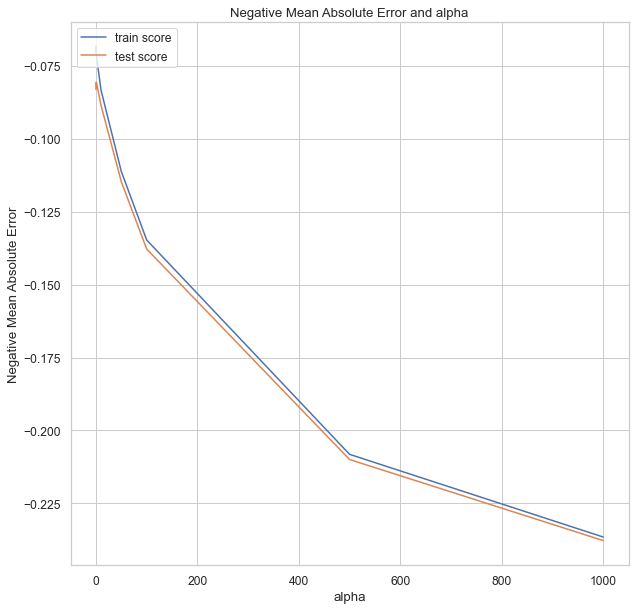

In [864]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [865]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [866]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004388,1.738571e-03,0.003191,1.162941e-03,0.001,{'alpha': 0.001},-0.089594,-0.078414,-0.082438,-0.069460,...,-0.083059,0.008963,5,-0.067703,-0.069665,-0.067449,-0.072310,-0.064400,-0.068305,0.002617
1,0.003989,8.916969e-04,0.001795,7.469137e-04,0.01,{'alpha': 0.01},-0.089457,-0.078343,-0.082402,-0.069466,...,-0.082945,0.008857,4,-0.067738,-0.069696,-0.067458,-0.072327,-0.064453,-0.068334,0.002607
2,0.003192,3.990651e-04,0.001995,4.101908e-07,1.0,{'alpha': 1.0},-0.088556,-0.076924,-0.081963,-0.070480,...,-0.080661,0.006387,1,-0.071145,-0.073010,-0.069777,-0.074793,-0.069823,-0.071710,0.001940
3,0.003591,7.981190e-04,0.002194,3.988028e-04,2.0,{'alpha': 2.0},-0.090206,-0.078189,-0.082575,-0.072116,...,-0.081421,0.006038,2,-0.073038,-0.075230,-0.071478,-0.076556,-0.072880,-0.073836,0.001814
4,0.004387,1.017412e-03,0.002992,6.309019e-04,3.0,{'alpha': 3.0},-0.091444,-0.079356,-0.082988,-0.073758,...,-0.082310,0.005807,3,-0.074560,-0.076859,-0.072853,-0.077943,-0.074946,-0.075432,0.001788
5,0.003390,4.881898e-04,0.002991,8.919113e-04,4.0,{'alpha': 4.0},-0.092564,-0.080462,-0.083349,-0.075222,...,-0.083250,0.005674,6,-0.075890,-0.078164,-0.074152,-0.079159,-0.076606,-0.076794,0.001749
6,0.003198,3.947276e-04,0.002785,4.140393e-04,5.0,{'alpha': 5.0},-0.093588,-0.081581,-0.083834,-0.076570,...,-0.084178,0.005560,7,-0.077174,-0.079316,-0.075427,-0.080308,-0.077998,-0.078045,0.001694
7,0.004585,4.866303e-04,0.002992,6.314299e-04,6.0,{'alpha': 6.0},-0.094613,-0.082690,-0.084508,-0.077832,...,-0.085120,0.005481,8,-0.078309,-0.080372,-0.076582,-0.081429,-0.079315,-0.079201,0.001673
8,0.002992,5.223489e-07,0.002593,7.979752e-04,7.0,{'alpha': 7.0},-0.095602,-0.083659,-0.085121,-0.078976,...,-0.086000,0.005444,9,-0.079367,-0.081350,-0.077679,-0.082475,-0.080515,-0.080277,0.001650
9,0.003989,8.924434e-04,0.002593,7.968072e-04,8.0,{'alpha': 8.0},-0.096551,-0.084512,-0.085732,-0.080032,...,-0.086830,0.005432,10,-0.080413,-0.082278,-0.078764,-0.083510,-0.081637,-0.081320,0.001623


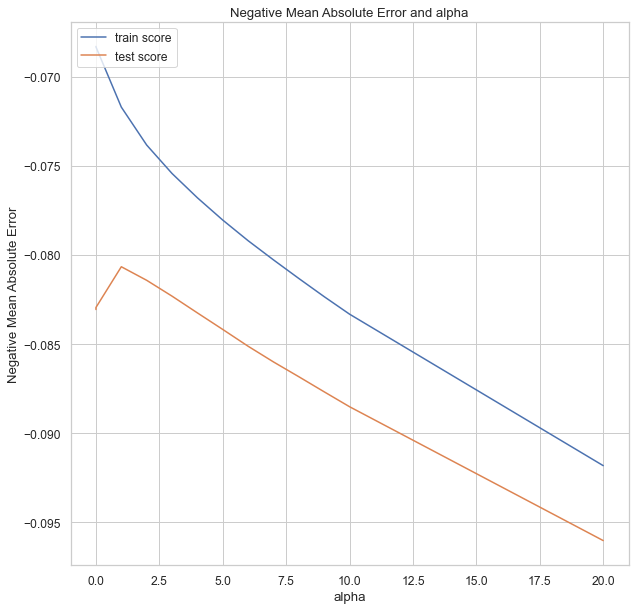

In [867]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [868]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge()
 The best r2 score is obtained at alpha 1.0


### <font color='green'>Ridge Regression model with Optimal Value</font>

In [869]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [870]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train_data.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [871]:
#selecting the top 10 variables with Alpha-1.0
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.274098,10.274098
55,MSSubClass_85,-0.433124,0.433124
3,OverallCond,0.403853,0.403853
16,HeatingQC,0.308760,0.308760
13,BsmtFinSF2,0.281259,0.281259
10,BsmtFinType1,0.274331,0.274331
14,BsmtUnfSF,0.264105,0.264105
7,BsmtQual,0.262287,0.262287
33,GarageFinish,0.242151,0.242151
2,OverallQual,0.232591,0.232591


In [872]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9253
Ridge regression test r2:  0.7834


### <font color='green'>Lasso Regression model</font>

In [873]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [874]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028922,1.326016e-02,0.002593,7.980943e-04,0.0001,{'alpha': 0.0001},-0.086833,-0.075438,-0.082740,-0.068702,...,-0.081259,0.008403,1,-0.069812,-0.071802,-0.069197,-0.073817,-0.066276,-0.070181,0.002537
1,0.007580,1.351404e-03,0.002593,7.994893e-04,0.001,{'alpha': 0.001},-0.094621,-0.085253,-0.085531,-0.074224,...,-0.086395,0.007117,2,-0.078786,-0.081204,-0.077771,-0.083112,-0.078429,-0.079860,0.001997
2,0.003391,4.885587e-04,0.001994,6.312035e-04,0.01,{'alpha': 0.01},-0.137656,-0.124340,-0.119095,-0.123085,...,-0.126920,0.006483,3,-0.124858,-0.125481,-0.122445,-0.126155,-0.124484,-0.124685,0.001256
3,0.003392,4.891816e-04,0.001994,6.309780e-04,0.05,{'alpha': 0.05},-0.281777,-0.248796,-0.266436,-0.261558,...,-0.265319,0.010645,4,-0.257585,-0.265357,-0.266801,-0.263500,-0.268182,-0.264285,0.003693
4,0.003191,7.465697e-04,0.057776,1.115638e-01,0.1,{'alpha': 0.1},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,5,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
5,0.002394,4.897263e-04,0.001396,4.881707e-04,0.2,{'alpha': 0.2},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,5,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
6,0.002792,3.989227e-04,0.001994,3.504023e-07,0.3,{'alpha': 0.3},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,5,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
7,0.002992,6.975526e-07,0.001197,3.988983e-04,0.4,{'alpha': 0.4},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,5,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
8,0.002993,9.368364e-07,0.000997,9.725608e-07,0.5,{'alpha': 0.5},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,5,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
9,0.002626,5.196365e-04,0.001563,4.659000e-04,0.6,{'alpha': 0.6},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,5,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298


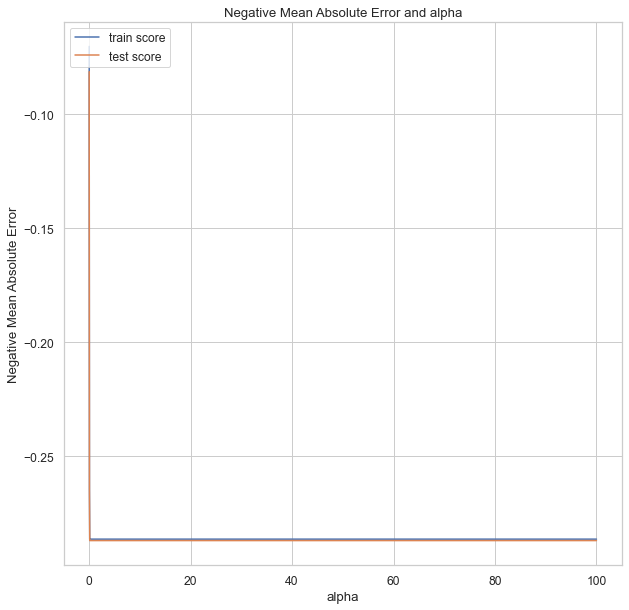

In [875]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [876]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [877]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007197,0.001339,0.002192,9.761690e-04,0.001,{'alpha': 0.001},-0.094621,-0.085253,-0.085531,-0.074224,...,-0.086395,0.007117,1,-0.078786,-0.081204,-0.077771,-0.083112,-0.078429,-0.079860,0.001997
1,0.003184,0.000403,0.001410,8.260489e-04,0.01,{'alpha': 0.01},-0.137656,-0.124340,-0.119095,-0.123085,...,-0.126920,0.006483,2,-0.124858,-0.125481,-0.122445,-0.126155,-0.124484,-0.124685,0.001256
2,0.002385,0.000479,0.001596,4.885387e-04,0.05,{'alpha': 0.05},-0.281777,-0.248796,-0.266436,-0.261558,...,-0.265319,0.010645,3,-0.257585,-0.265357,-0.266801,-0.263500,-0.268182,-0.264285,0.003693
3,0.002593,0.000489,0.001397,4.886555e-04,0.1,{'alpha': 0.1},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,4,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
4,0.002393,0.000489,0.001396,4.886750e-04,0.2,{'alpha': 0.2},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,4,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
5,0.002793,0.000746,0.001596,7.976891e-04,0.3,{'alpha': 0.3},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,4,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
6,0.003591,0.001018,0.002393,4.886753e-04,0.4,{'alpha': 0.4},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,4,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
7,0.002394,0.000489,0.001596,4.886168e-04,0.5,{'alpha': 0.5},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,4,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
8,0.002594,0.000490,0.001197,3.980898e-04,0.6,{'alpha': 0.6},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,4,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298
9,0.002393,0.000798,0.001995,4.623108e-07,0.7,{'alpha': 0.7},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,4,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298


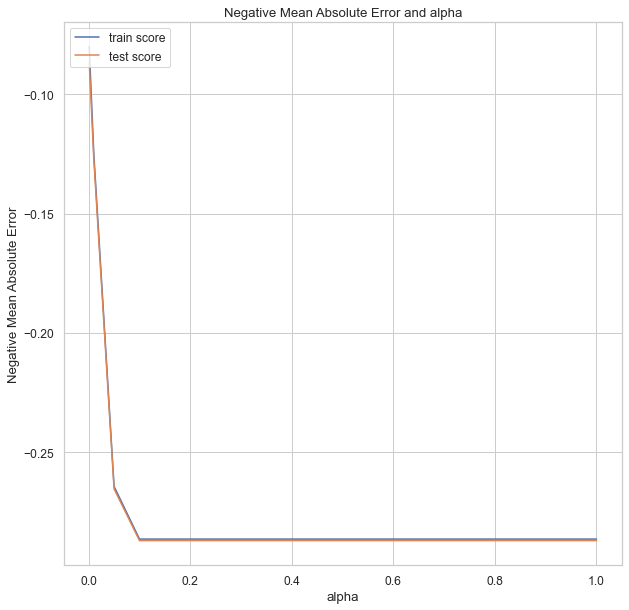

In [878]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [879]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [880]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [881]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020334,0.008727,0.002610,5.022464e-04,0.0001,{'alpha': 0.0001},-0.086833,-0.075438,-0.082740,-0.068702,...,-0.081259,0.008403,1,-0.069812,-0.071802,-0.069197,-0.073817,-0.066276,-0.070181,0.002537
1,0.004986,0.000631,0.001596,4.884803e-04,0.001,{'alpha': 0.001},-0.094621,-0.085253,-0.085531,-0.074224,...,-0.086395,0.007117,2,-0.078786,-0.081204,-0.077771,-0.083112,-0.078429,-0.079860,0.001997
2,0.002793,0.000400,0.001994,6.675720e-07,0.01,{'alpha': 0.01},-0.137656,-0.124340,-0.119095,-0.123085,...,-0.126920,0.006483,3,-0.124858,-0.125481,-0.122445,-0.126155,-0.124484,-0.124685,0.001256
3,0.003591,0.001017,0.002194,7.463661e-04,0.05,{'alpha': 0.05},-0.281777,-0.248796,-0.266436,-0.261558,...,-0.265319,0.010645,4,-0.257585,-0.265357,-0.266801,-0.263500,-0.268182,-0.264285,0.003693
4,0.002385,0.000478,0.001396,4.887140e-04,0.1,{'alpha': 0.1},-0.300951,-0.276798,-0.287200,-0.281414,...,-0.286972,0.008151,5,-0.282382,-0.289465,-0.286030,-0.287242,-0.286564,-0.286337,0.002298


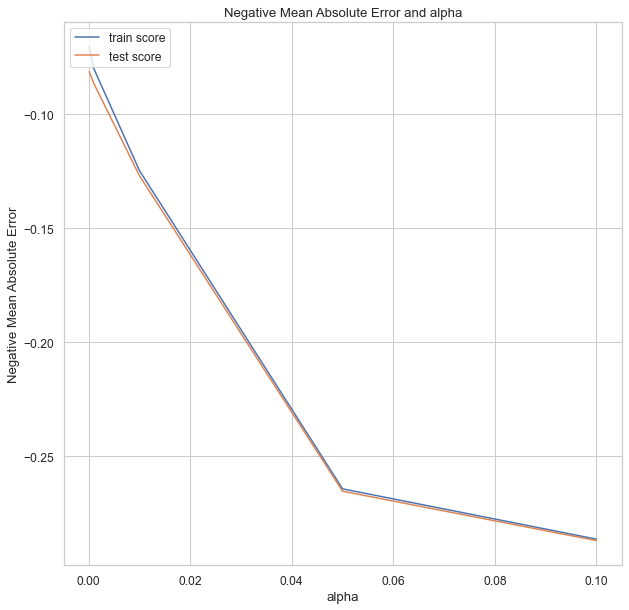

In [882]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [883]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [884]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025332,0.006664,0.002593,0.001016,0.00001,{'alpha': 1e-05},-0.088709,-0.077512,-0.082471,-0.069423,...,-0.082676,0.008913,2,-0.067834,-0.069804,-0.067548,-0.072395,-0.064512,-0.068419,0.002611
1,0.020944,0.009628,0.002194,0.000399,0.0001,{'alpha': 0.0001},-0.086833,-0.075438,-0.082740,-0.068702,...,-0.081259,0.008403,1,-0.069812,-0.071802,-0.069197,-0.073817,-0.066276,-0.070181,0.002537
2,0.004986,0.000893,0.001596,0.000488,0.001,{'alpha': 0.001},-0.094621,-0.085253,-0.085531,-0.074224,...,-0.086395,0.007117,3,-0.078786,-0.081204,-0.077771,-0.083112,-0.078429,-0.079860,0.001997
3,0.003192,0.000397,0.001595,0.000808,0.01,{'alpha': 0.01},-0.137656,-0.124340,-0.119095,-0.123085,...,-0.126920,0.006483,4,-0.124858,-0.125481,-0.122445,-0.126155,-0.124484,-0.124685,0.001256
4,0.002393,0.000489,0.001596,0.000489,0.05,{'alpha': 0.05},-0.281777,-0.248796,-0.266436,-0.261558,...,-0.265319,0.010645,5,-0.257585,-0.265357,-0.266801,-0.263500,-0.268182,-0.264285,0.003693


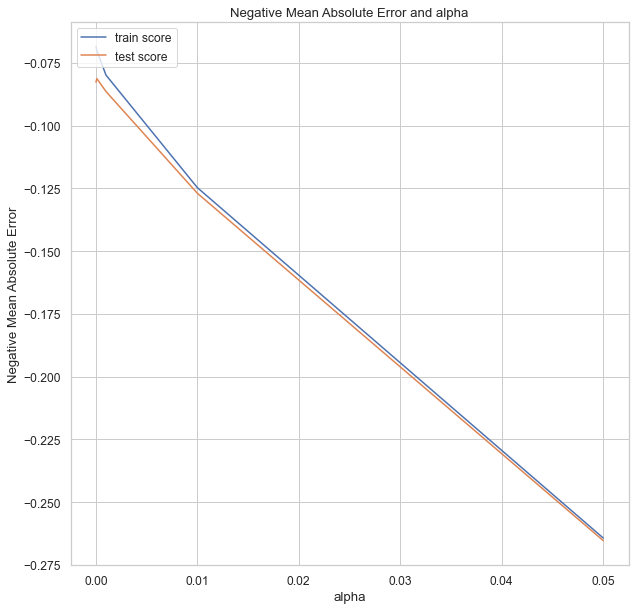

In [885]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [886]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [887]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [888]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026530,0.007533,0.001817,0.000410,0.00001,{'alpha': 1e-05},-0.088709,-0.077512,-0.082471,-0.069423,...,-0.082676,0.008913,2,-0.067834,-0.069804,-0.067548,-0.072395,-0.064512,-0.068419,0.002611
1,0.019340,0.010127,0.001397,0.000489,0.0001,{'alpha': 0.0001},-0.086833,-0.075438,-0.082740,-0.068702,...,-0.081259,0.008403,1,-0.069812,-0.071802,-0.069197,-0.073817,-0.066276,-0.070181,0.002537
2,0.005185,0.000399,0.001596,0.000488,0.001,{'alpha': 0.001},-0.094621,-0.085253,-0.085531,-0.074224,...,-0.086395,0.007117,3,-0.078786,-0.081204,-0.077771,-0.083112,-0.078429,-0.079860,0.001997


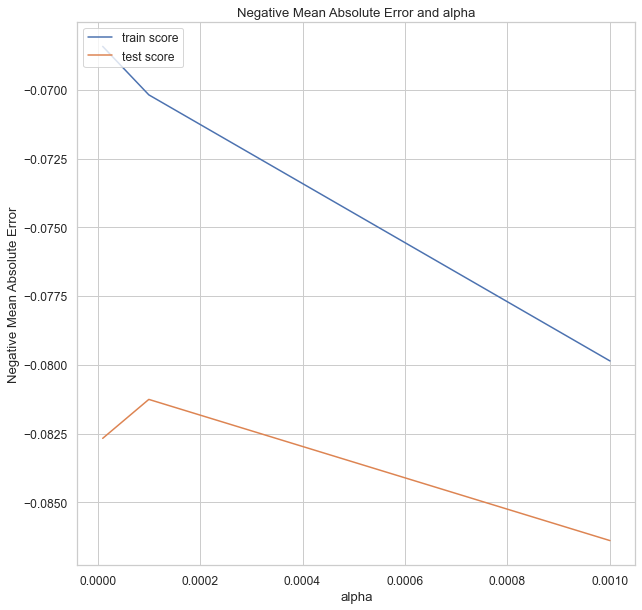

In [889]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [890]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

### <font color='green'>Lasso Regression model with Optimal Value</font>

In [891]:
# After performing grid search we found the same alpha that ue use before with-lasso-0.0001
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9270055122443596
Lasso Regression test r2: 0.7799611994514969


In [892]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [893]:
lasso_coef

,Feature,Coef,mod
0,LotFrontage,10.249130,10.249130
1,LotArea,0.104492,0.104492
2,OverallQual,0.328184,0.328184
3,OverallCond,0.439960,0.439960
4,MasVnrArea,0.221770,0.221770
...,...,...,...
85,SaleType_Con,0.000000,0.000000
86,SaleType_Oth,0.000000,0.000000
87,SaleCondition_Alloca,0.095036,0.095036
88,SaleCondition_Normal,-0.052354,0.052354


In [894]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.249130,10.249130
55,Condition2_RRAe,-0.770999,0.770999
3,OverallCond,0.439960,0.439960
10,HeatingQC,0.378368,0.378368
13,2ndFlrSF,0.368625,0.368625
14,LowQualFinSF,0.348884,0.348884
33,MSZoning_RH,0.328228,0.328228
2,OverallQual,0.328184,0.328184
35,MSZoning_RM,0.278846,0.278846
36,Utilities_NoSeWa,0.236642,0.236642


In [895]:
lasso.coef_

array([ 0.10449207,  0.32818424,  0.43995962,  0.22176978,  0.05120066,
        0.0974765 ,  0.22502619,  0.07433231, -0.        ,  0.37836781,
        0.08643544,  0.076519  ,  0.36862522,  0.34888406, -0.        ,
        0.21084754, -0.17506763,  0.12322595,  0.10088738,  0.13840159,
        0.0973354 ,  0.19010512,  0.13490573,  0.06914211,  0.04472926,
        0.08561682, -0.07651442, -0.01882779, -0.08779793, -0.03555436,
       -0.        ,  0.        ,  0.32822844,  0.15912051,  0.27884627,
        0.2366425 , -0.14189814, -0.        , -0.01501611, -0.11151749,
        0.09009279, -0.0813584 , -0.20567914, -0.05400095, -0.04708153,
        0.07491094, -0.06476346,  0.06712814,  0.06084041, -0.03255903,
        0.06377544, -0.10142233,  0.03266943,  0.        , -0.77099928,
       -0.        ,  0.        ,  0.0428709 , -0.        , -0.01068876,
        0.04933508,  0.09131813,  0.00402463,  0.04412173, -0.0054046 ,
       -0.        , -0.        , -0.01904446,  0.09527975,  0.  

## <font color='orange'>Final Modelling-Data Evaluation</font>

#### Because the Lasso Regression model requires fewer variables while providing almost the same accuracy, we shall employ it. than the Ridge regression model, it is a more effective model.

In [896]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9270055122443596
0.7799611994514969


### <font color='green'>Insights</font>

### The business is curious about-Which factors are important in determining how much a property will cost:
1. LotFrontage: The price will rise if the number of linear feet of street connecting the house to the property increases.
2. BsmtFullBath: The sale price increases if the bathroom space is larger.
3. Overall Condition: The sale price is greater if the overall condition is excellent.
4. MSZoning RH: The sale price is higher if the home is close to a residential neighbourhood.
5. Overall quality: The sale price is higher if the overall condition is excellent.
6. Exterior1st CBlock: The price is lower if the home's Exterior1st is a CBlock.
7. Garage Area: A high garage area will result in a higher sale price.
8. CentralAir: If the SalePrice is higher and the CentralAir is yes.

# <font color='blue'>Subjective Questions</font>

## <font color='red'> Question:1</font>

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### <font color='green'> Optimal value of alpha:</font>
#### For Ridge regression :1.0
#### For Lasso Regression :0.0001

In [897]:
# Model building using optimal alpha for Ridge Regression Model
ridge_modified = Ridge(alpha=2.0)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=2.0)

In [898]:
#creating coeffcients for the ridge regression with Alpha-2.0
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train_data.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [899]:
#selecting the top 10 variables with Alpha-2.0
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.274098,10.274098
55,MSSubClass_85,-0.433124,0.433124
3,OverallCond,0.403853,0.403853
16,HeatingQC,0.308760,0.308760
13,BsmtFinSF2,0.281259,0.281259
10,BsmtFinType1,0.274331,0.274331
14,BsmtUnfSF,0.264105,0.264105
7,BsmtQual,0.262287,0.262287
33,GarageFinish,0.242151,0.242151
2,OverallQual,0.232591,0.232591


In [900]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.9216363030938198
Ridge Regression test r2: 0.7881312243876577


In [901]:
# Model building using optimal alpha for Lasso Regression Model
lasso_modified = Lasso(alpha=0.0002)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [902]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [903]:
#Lasso Regression with Alpha-0.0002
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9236089706982725
Lasso Regression test r2: 0.7781683582071568


In [904]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.249130,10.249130
55,Condition2_RRAe,-0.770999,0.770999
3,OverallCond,0.439960,0.439960
10,HeatingQC,0.378368,0.378368
13,2ndFlrSF,0.368625,0.368625
14,LowQualFinSF,0.348884,0.348884
33,MSZoning_RH,0.328228,0.328228
2,OverallQual,0.328184,0.328184
35,MSZoning_RM,0.278846,0.278846
36,Utilities_NoSeWa,0.236642,0.236642


## <font color='red'> Question:3</font>

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [905]:
# After performing grid search we found the same alpha that ue use before with-lasso-0.0001
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9270055122443596
Lasso Regression test r2: 0.7799611994514969


In [906]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [919]:
#selecting the top 5 variables in lasso model with alpha=0.001
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotFrontage,10.249130,10.249130
55,Condition2_RRAe,-0.770999,0.770999
3,OverallCond,0.439960,0.439960
10,HeatingQC,0.378368,0.378368
13,2ndFlrSF,0.368625,0.368625


In [920]:
X_train_new = X_train.drop(['LotFrontage','Condition2_RRAe','OverallCond','HeatingQC','2ndFlrSF'],axis=1)
X_test_new = X_test.drop(['LotFrontage','Condition2_RRAe','OverallCond','HeatingQC','2ndFlrSF'],axis=1)

X_test_new.head()
X_train_new.shape

(936, 85)

In [921]:
X_test_new.shape

(402, 85)

In [922]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [923]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017139,0.005020,0.002794,0.000747,0.0001,{'alpha': 0.0001},-0.093671,-0.082265,-0.085902,-0.072157,...,-0.086513,0.009177,1,-0.073509,-0.075639,-0.073234,-0.078379,-0.070406,-0.074234,0.002658
1,0.003790,0.000977,0.001595,0.000488,0.001,{'alpha': 0.001},-0.099154,-0.091177,-0.088832,-0.076811,...,-0.090282,0.007611,2,-0.082855,-0.084865,-0.081327,-0.087163,-0.082399,-0.083722,0.002068
2,0.002794,0.000399,0.001595,0.000487,0.01,{'alpha': 0.01},-0.137999,-0.124636,-0.119095,-0.123116,...,-0.127153,0.006624,3,-0.125173,-0.125792,-0.122445,-0.126714,-0.124691,-0.124963,0.001429


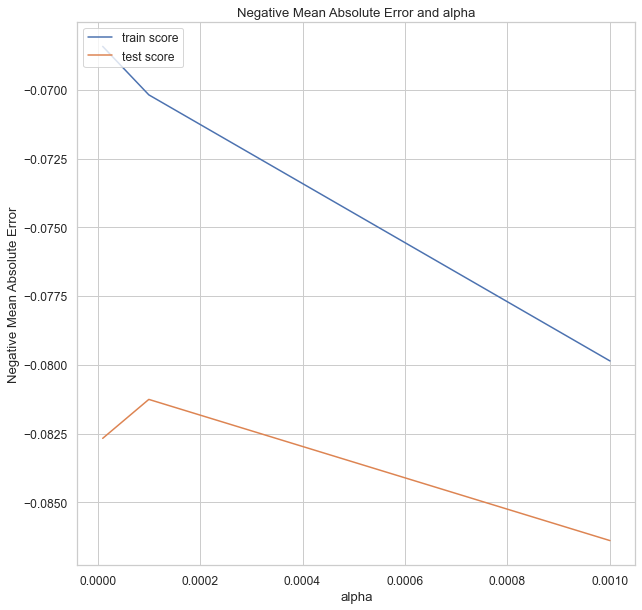

In [925]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [926]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [927]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9187156094708946
Lasso Regression test r2: 0.7844241060120802


In [928]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [929]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotArea,10.335595,10.335595
12,KitchenAbvGr,0.929802,0.929802
51,Condition2_RRAn,-0.780277,0.780277
2,MasVnrArea,0.447469,0.447469
1,OverallQual,0.406310,0.406310
